In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!nvidia-smi

Fri Apr 26 18:42:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              28W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ewJGTmLEGU9wdi5c5k2O")
project = rf.workspace("iaagl").project("traffic-lights-rqds4")
version = project.version(3)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 20


Extracting Dataset Version Zip to traffic-lights-3 in yolov8:: 100%|██████████| 41694/41694 [00:05<00:00, 7786.13it/s] 


In [6]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 conf=0.15 imgsz=640 plots=True val=True batch=16 optimizer='auto'  translate=0.2 scale=0.3 verbose=True patience=7 name='trianResult' 




#!yolo task=detect                    YOLO task: Object detection
#mode=train                           Training mode
#model=yolov8n.pt                     Model to be used for training (assuming it's a YOLOv8 variant)
#data={dataset.location}/data.yaml    Path to the YAML file containing dataset configuration
#epochs=25                            Number of training epochs
#conf=0.3                             Confidence threshold for object detection
#imgsz=640                            Input image size during training
#plots=True                           Enable plotting of training progress
#val=True                             Enable validation during training
#batch=16                             Batch size for training
#optimizer='auto'                     Automatic selection of optimizer
#verbose=True                         Enable verbose logging during training
#patience=7                           Patience for early stopping 
#name='trainResult'                   Name for the training result (assuming it's a saved model checkpoint)

100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 98.8MB/s]
New https://pypi.org/project/ultralytics/8.2.3 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/traffic-lights-3/data.yaml, epochs=50, patience=7, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trianResult, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.15, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

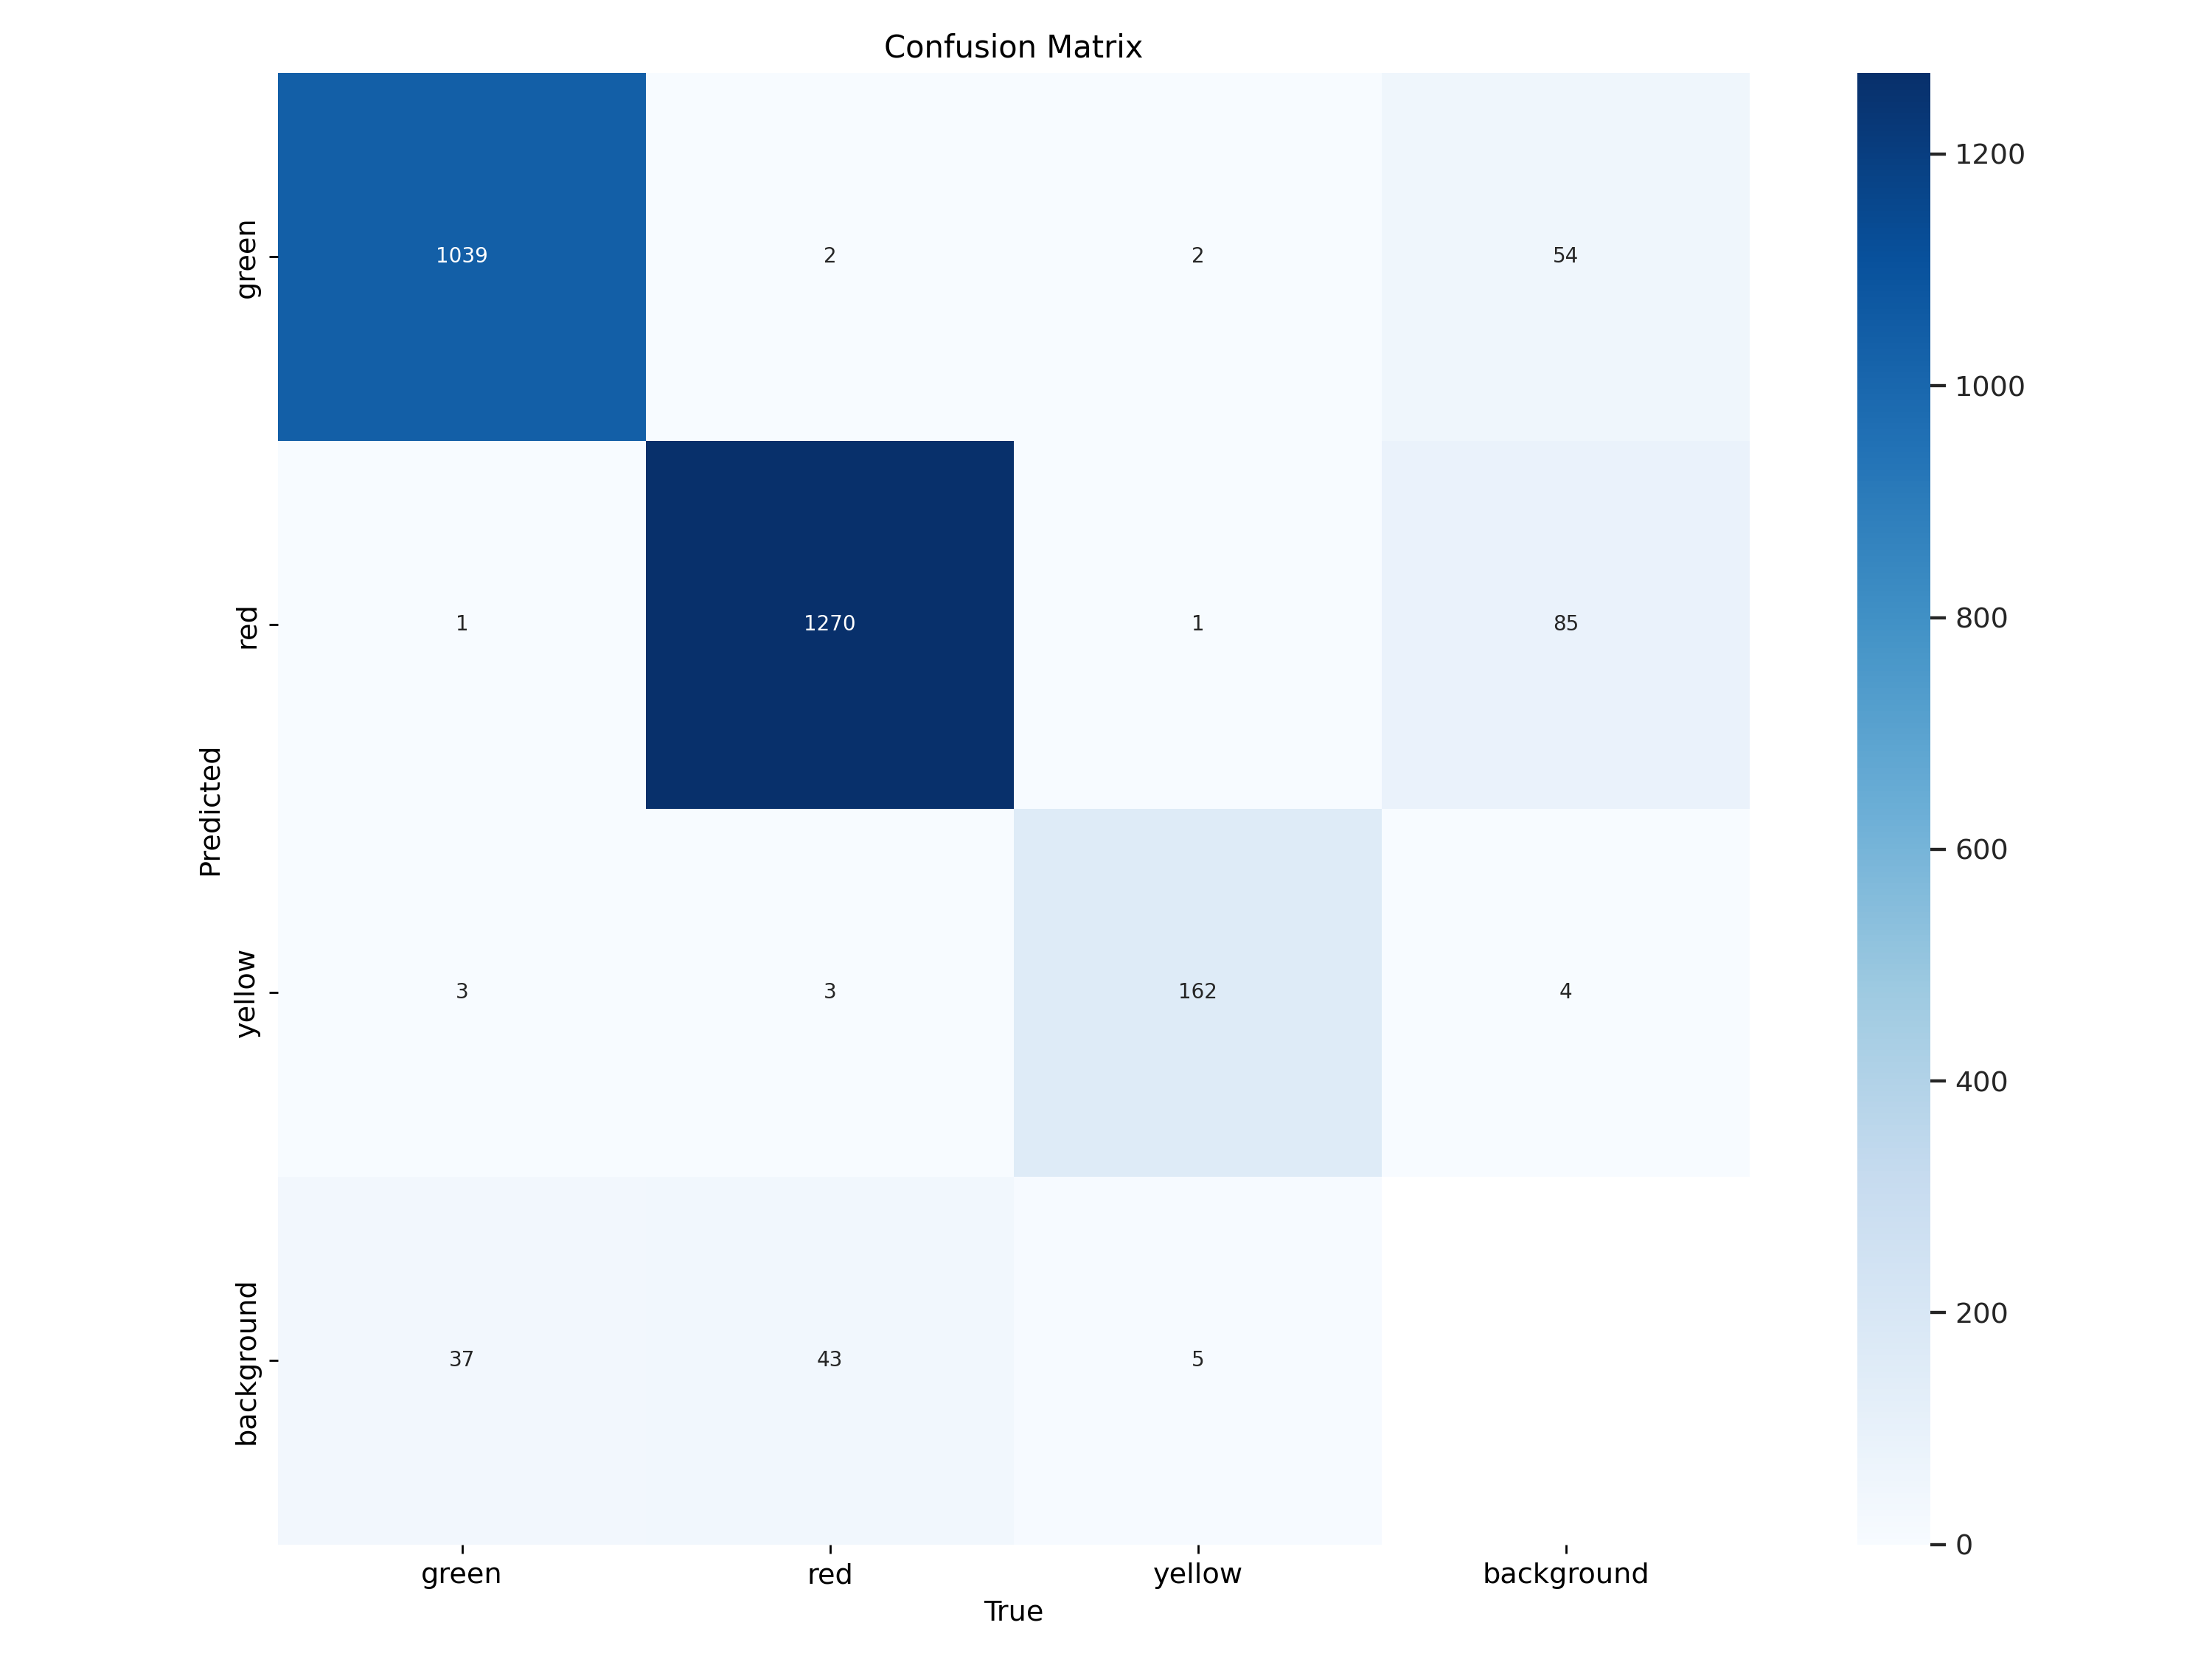

In [7]:
Image(filename='/kaggle/working/runs/detect/trianResult/confusion_matrix.png', width=600)

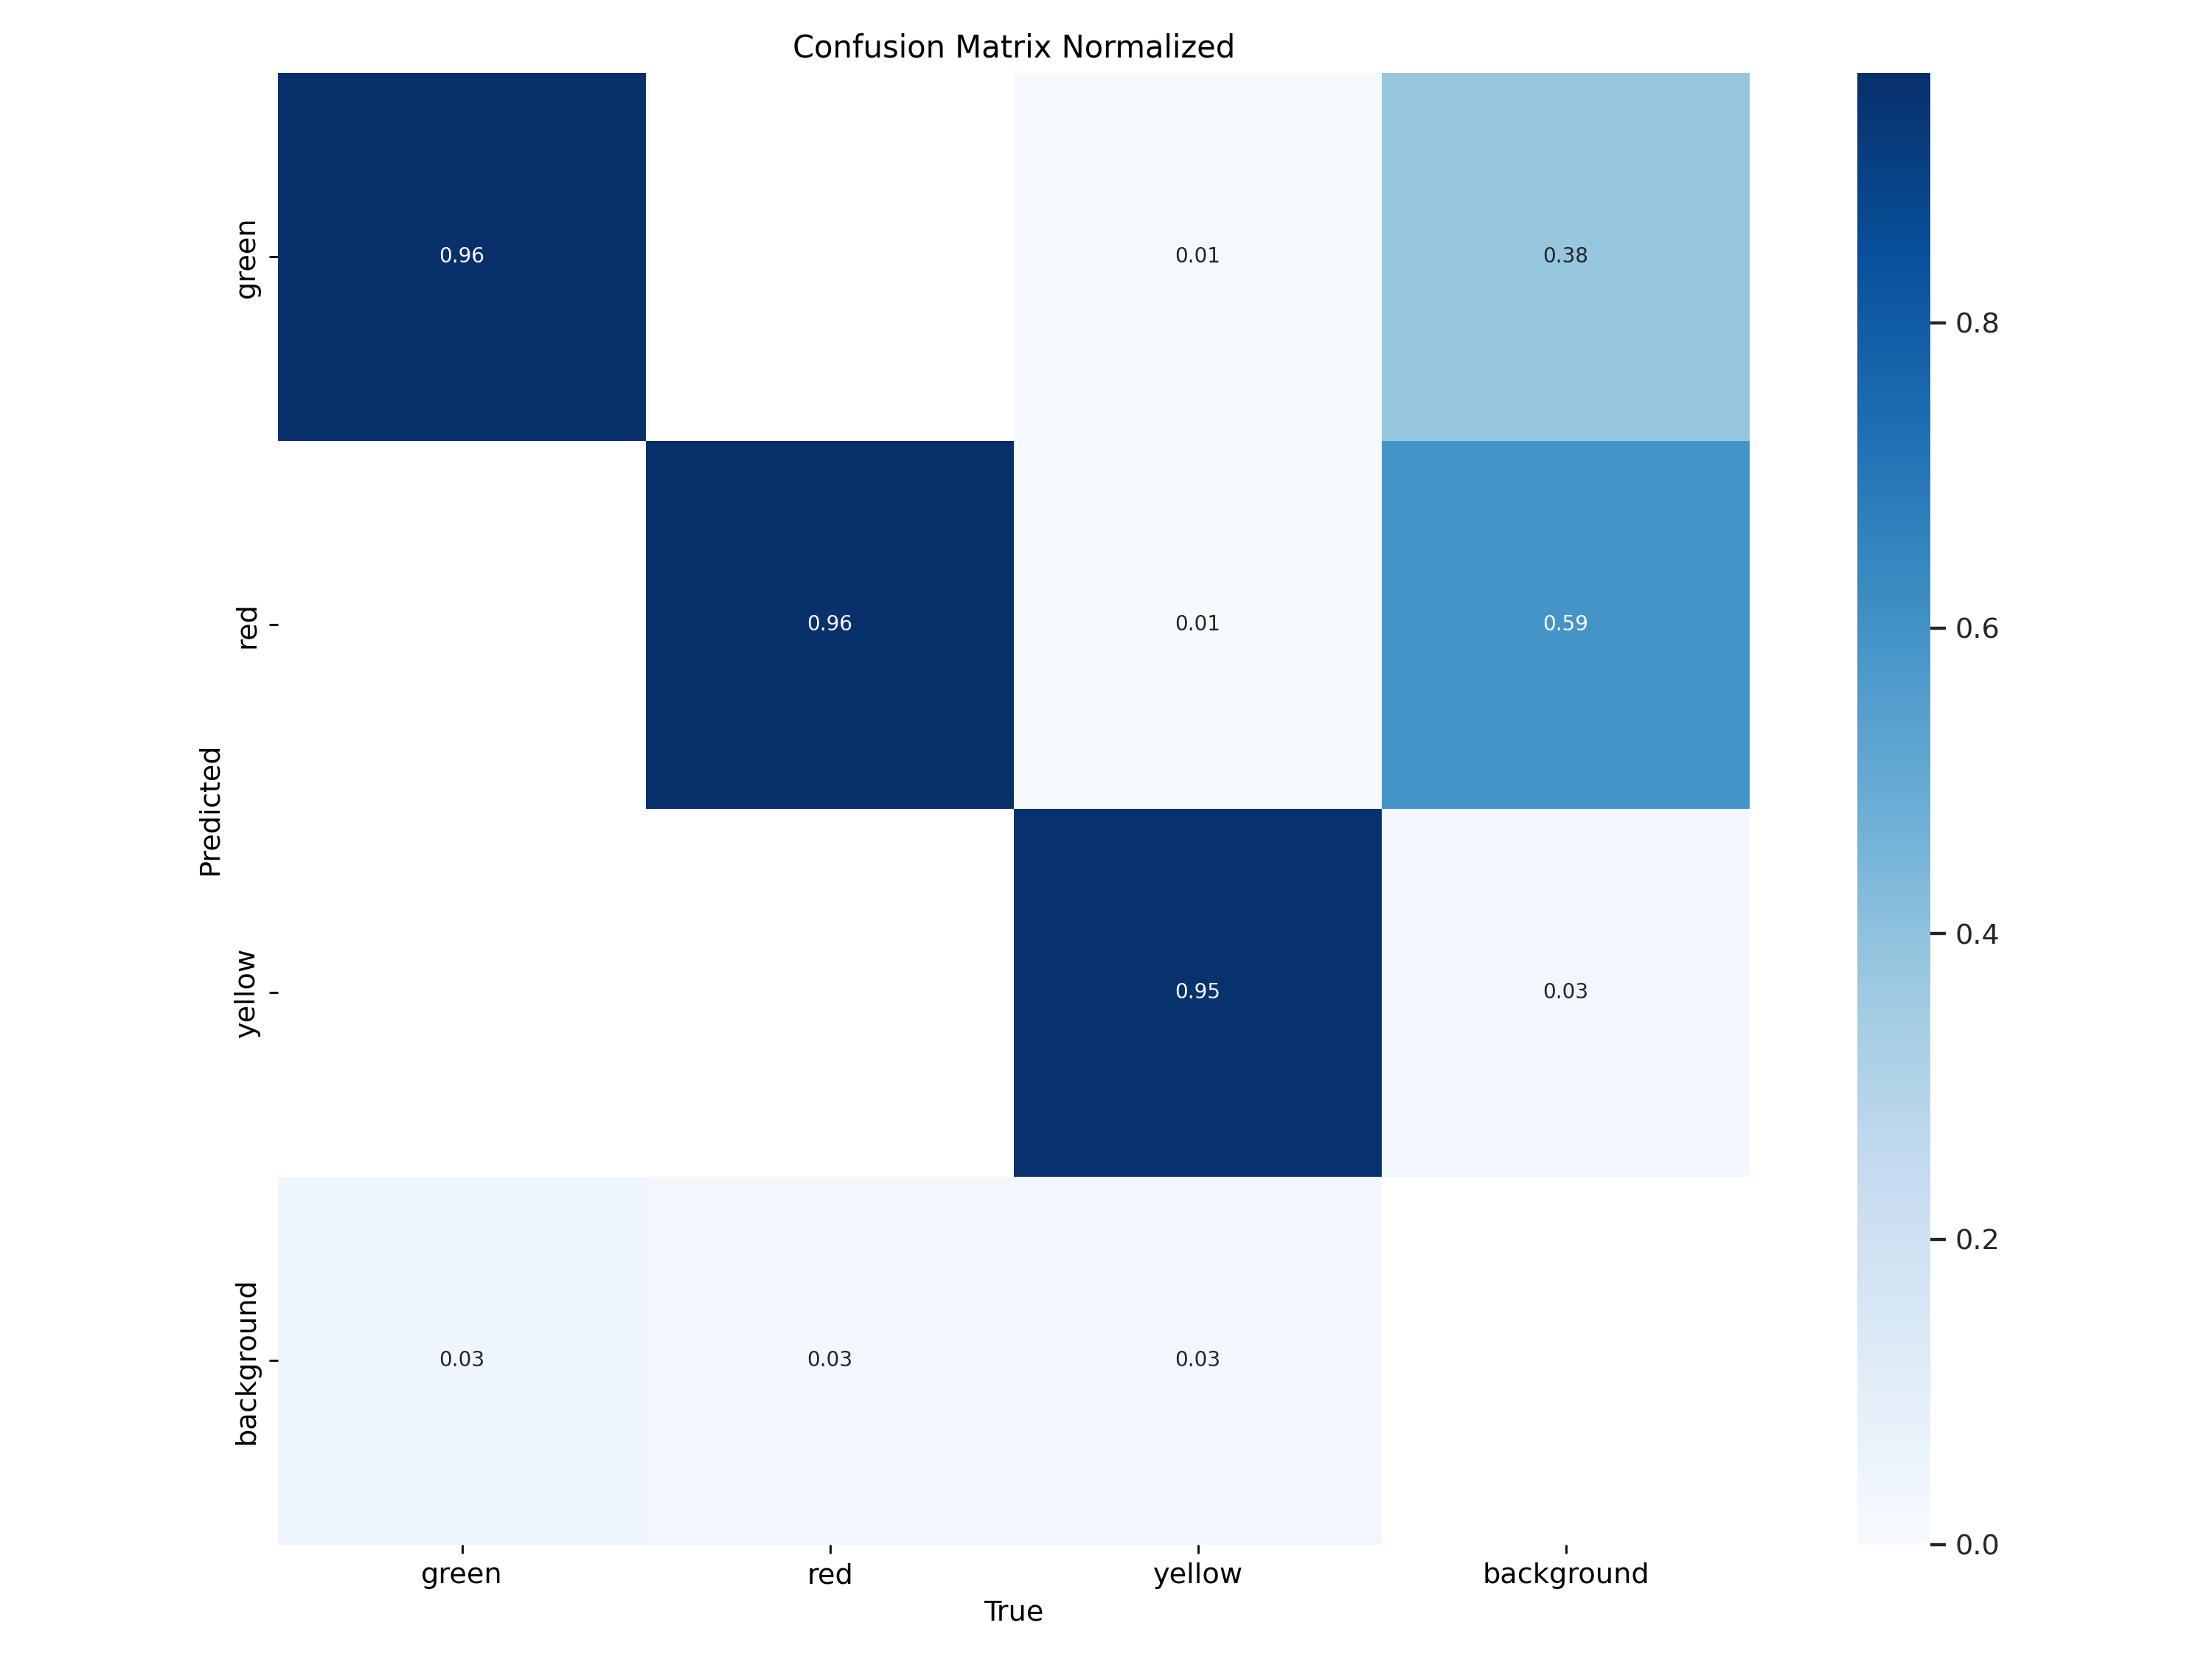

In [8]:
Image(filename='/kaggle/working/runs/detect/trianResult/confusion_matrix_normalized.png', width=600)

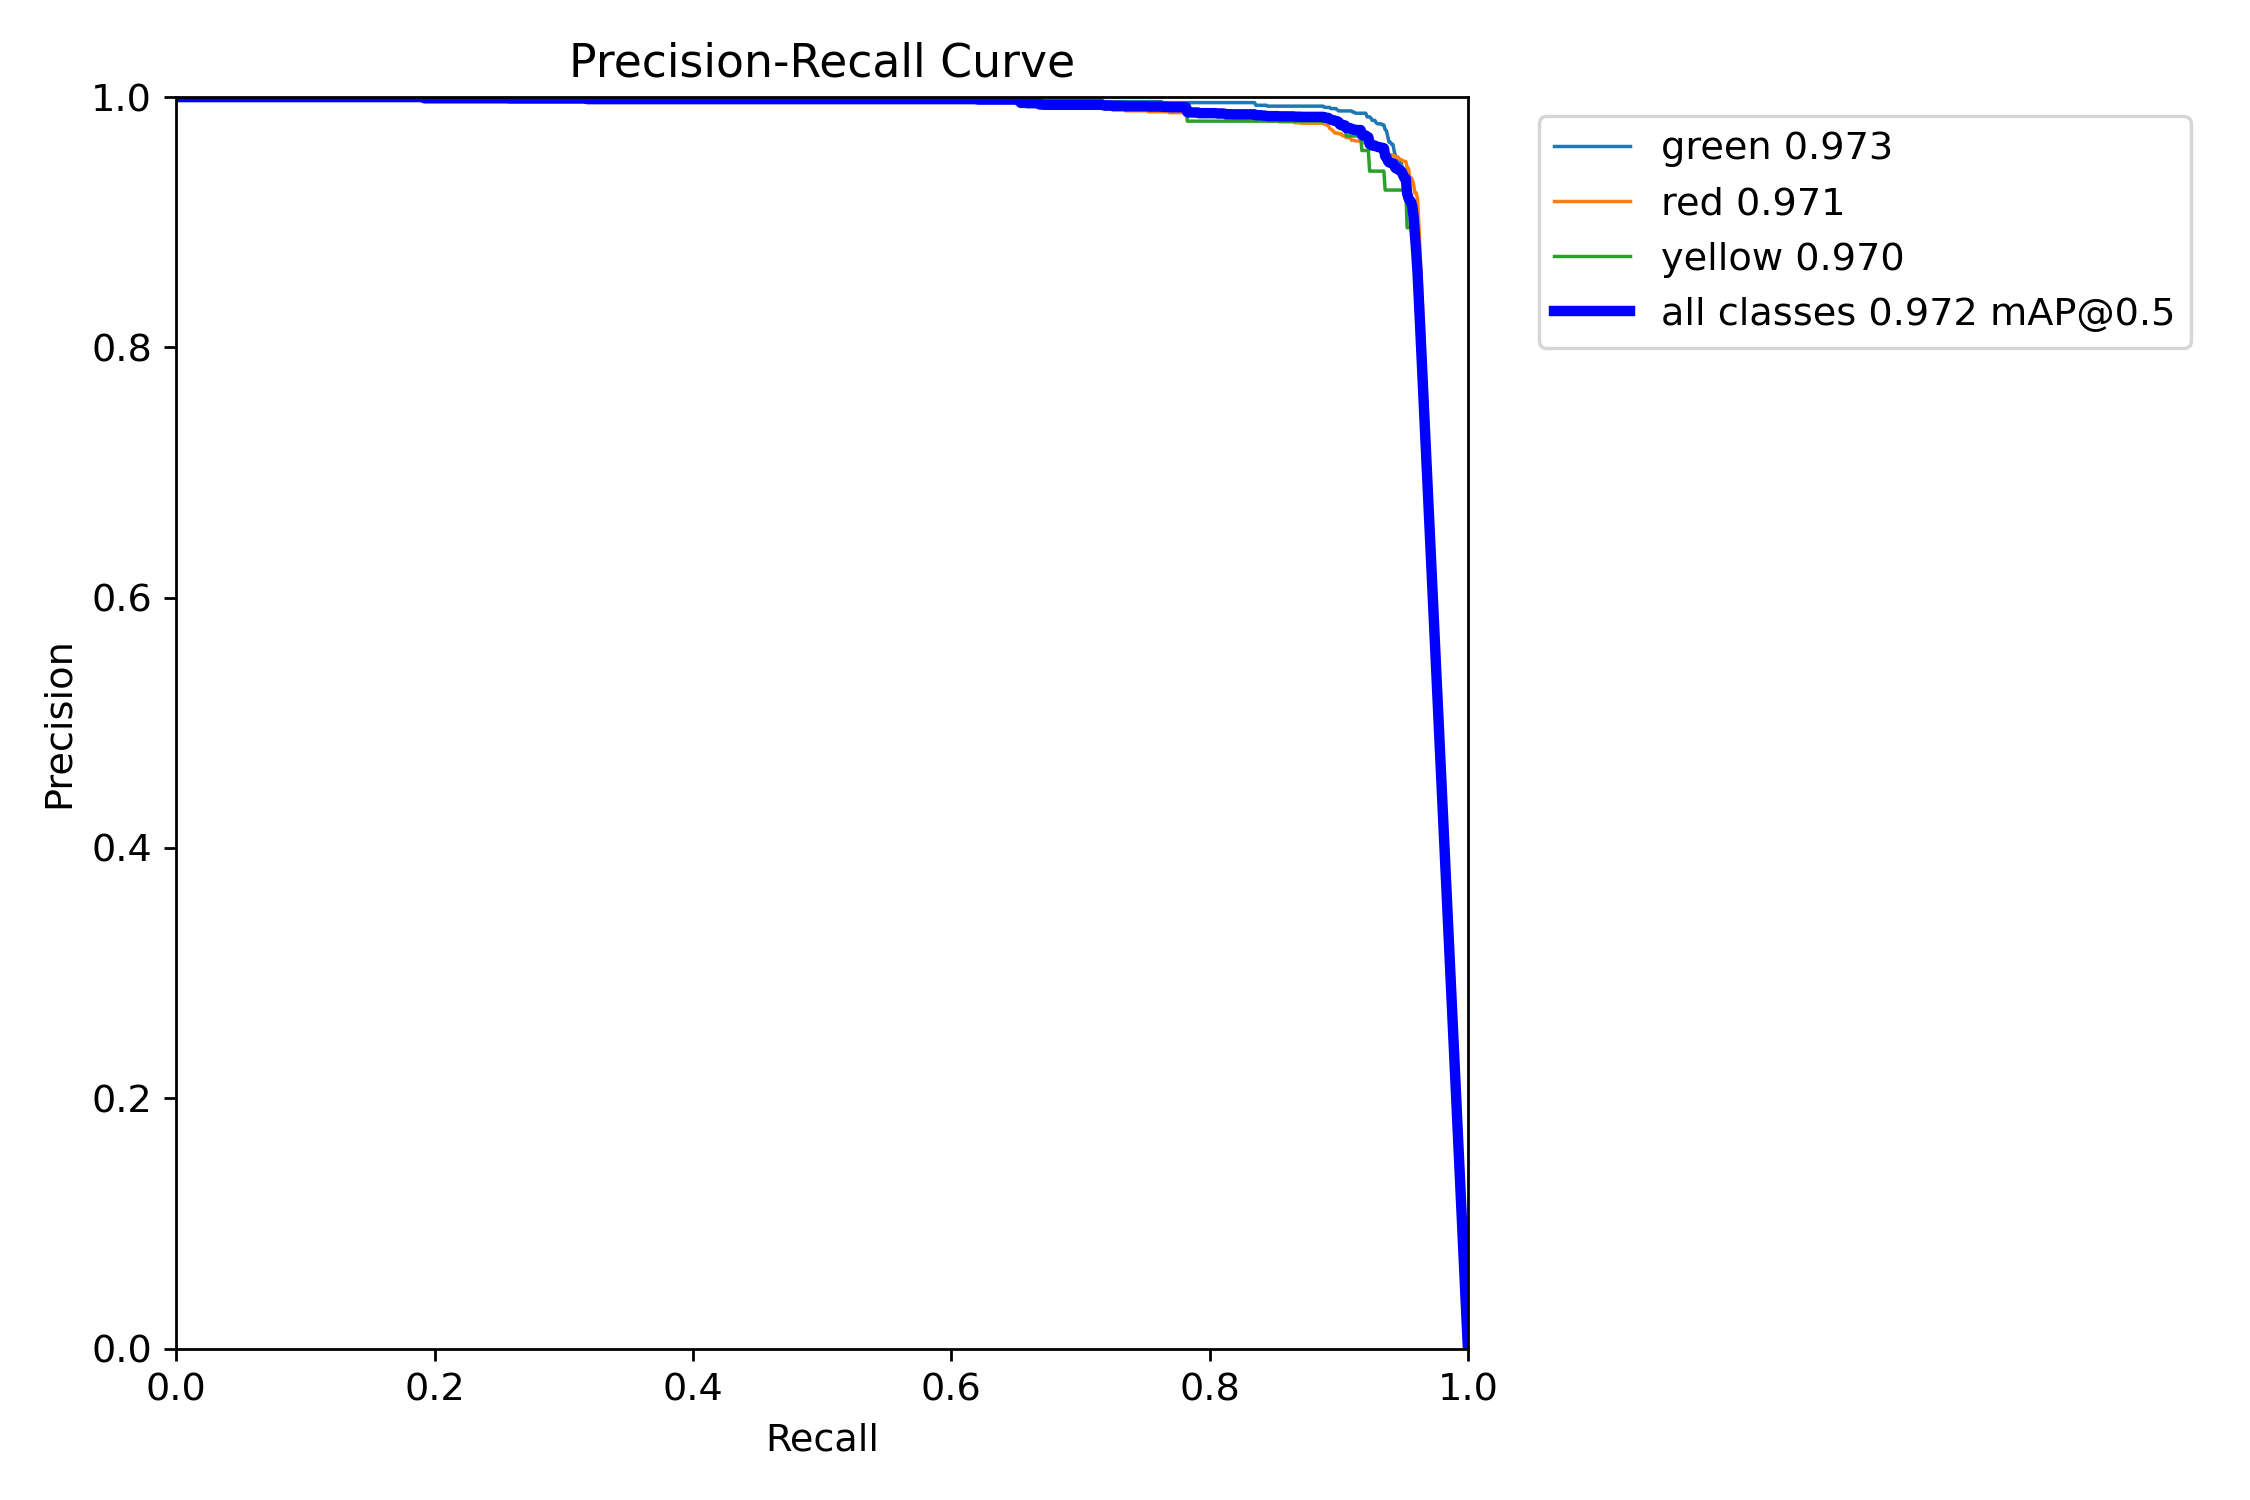

In [9]:
Image(filename='/kaggle/working/runs/detect/trianResult/PR_curve.png', width=600)

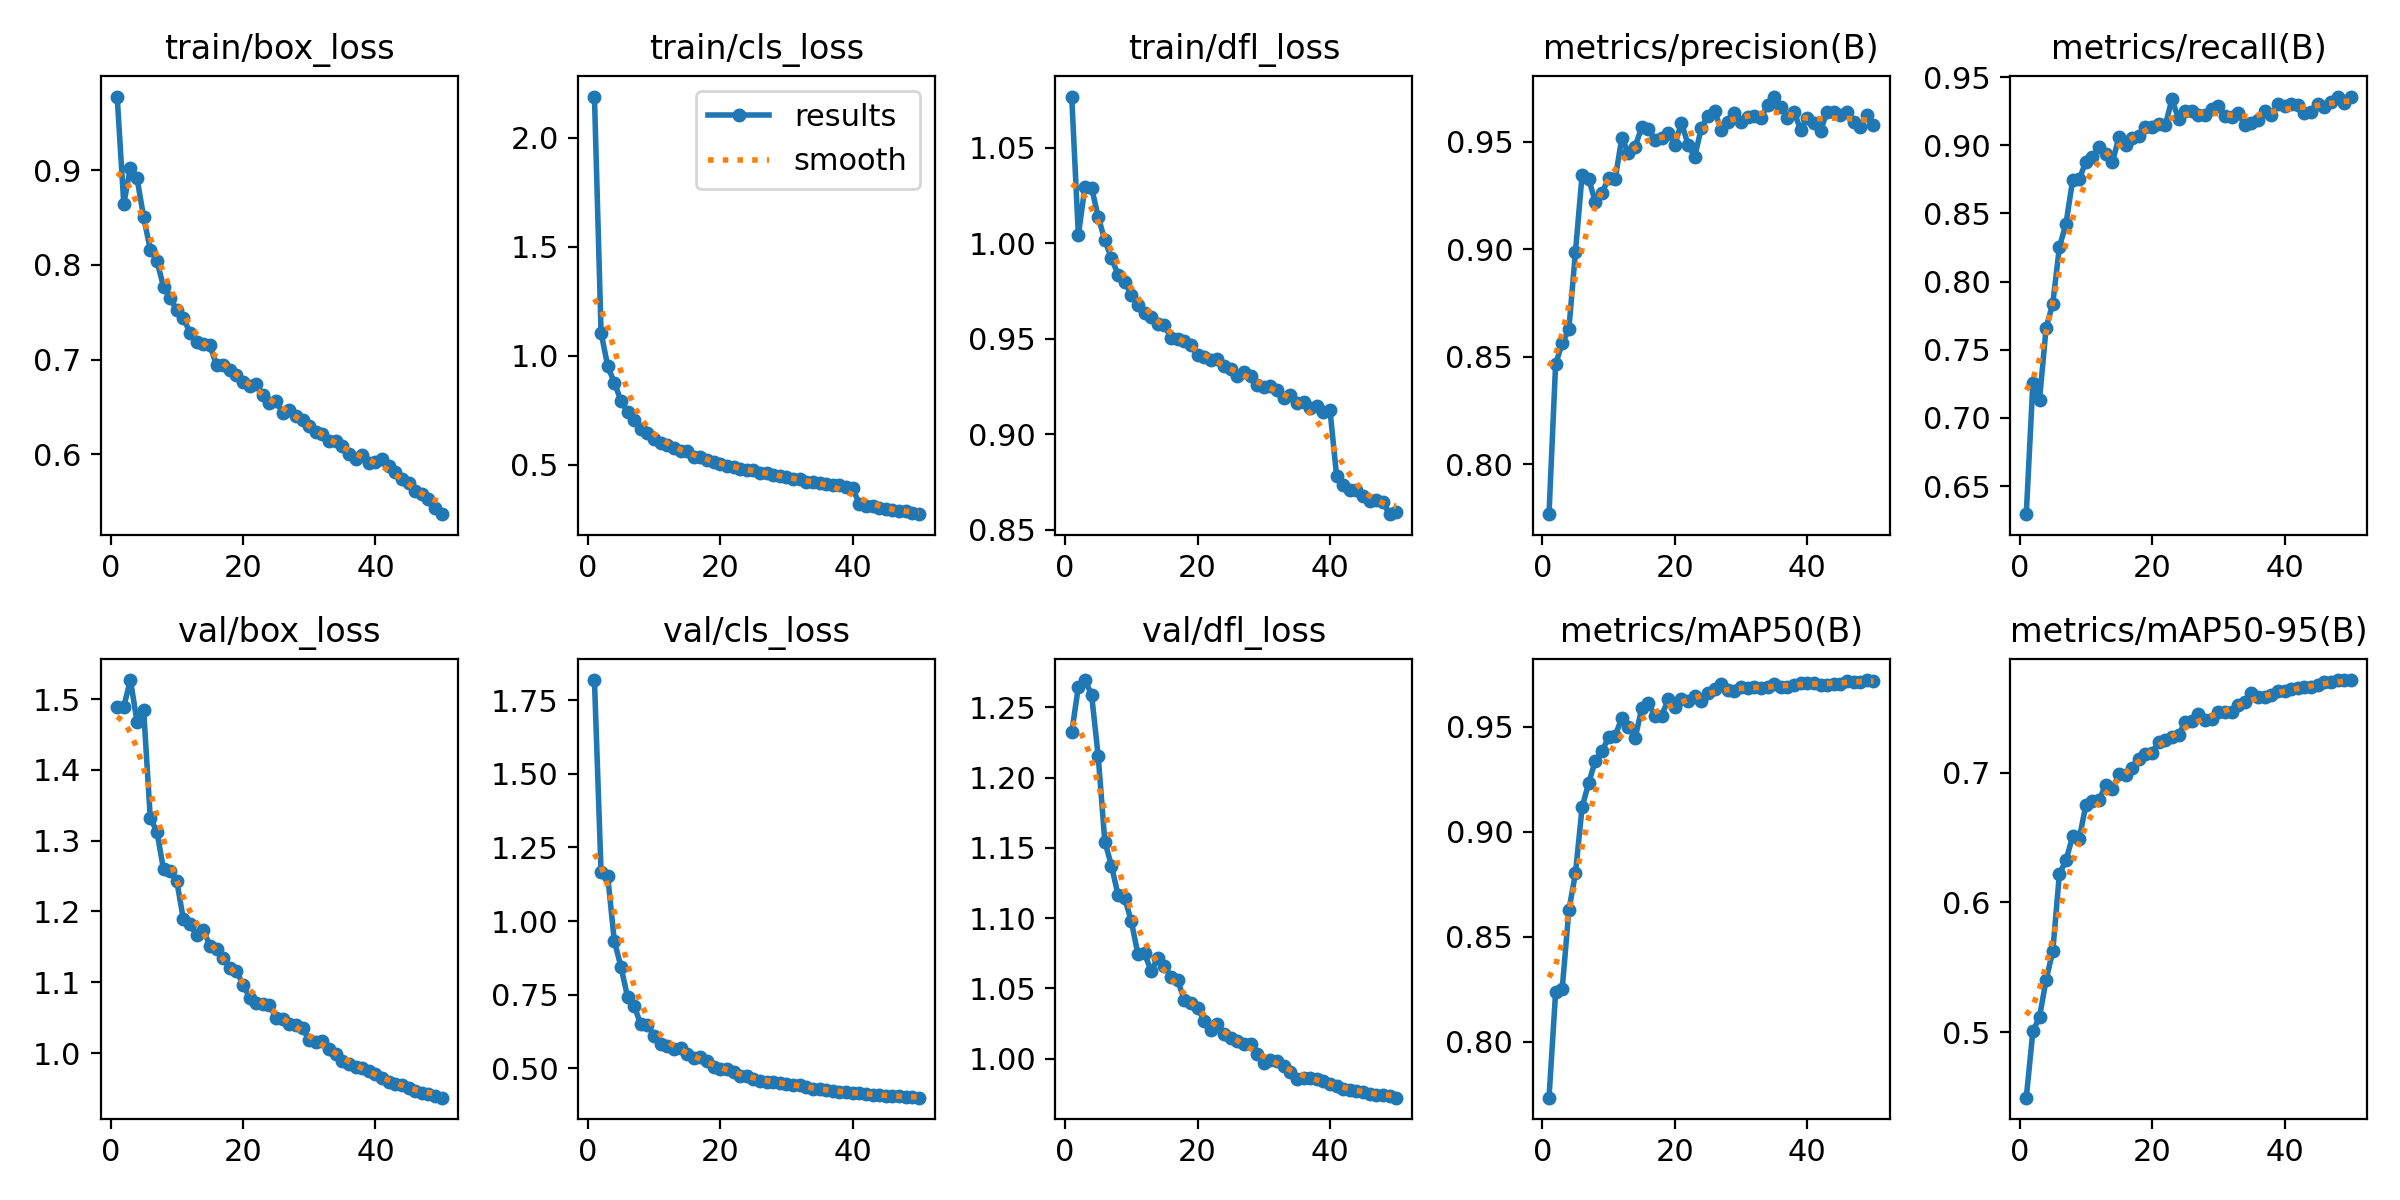

In [10]:
Image(filename='/kaggle/working/runs/detect/trianResult/results.png', width=600)

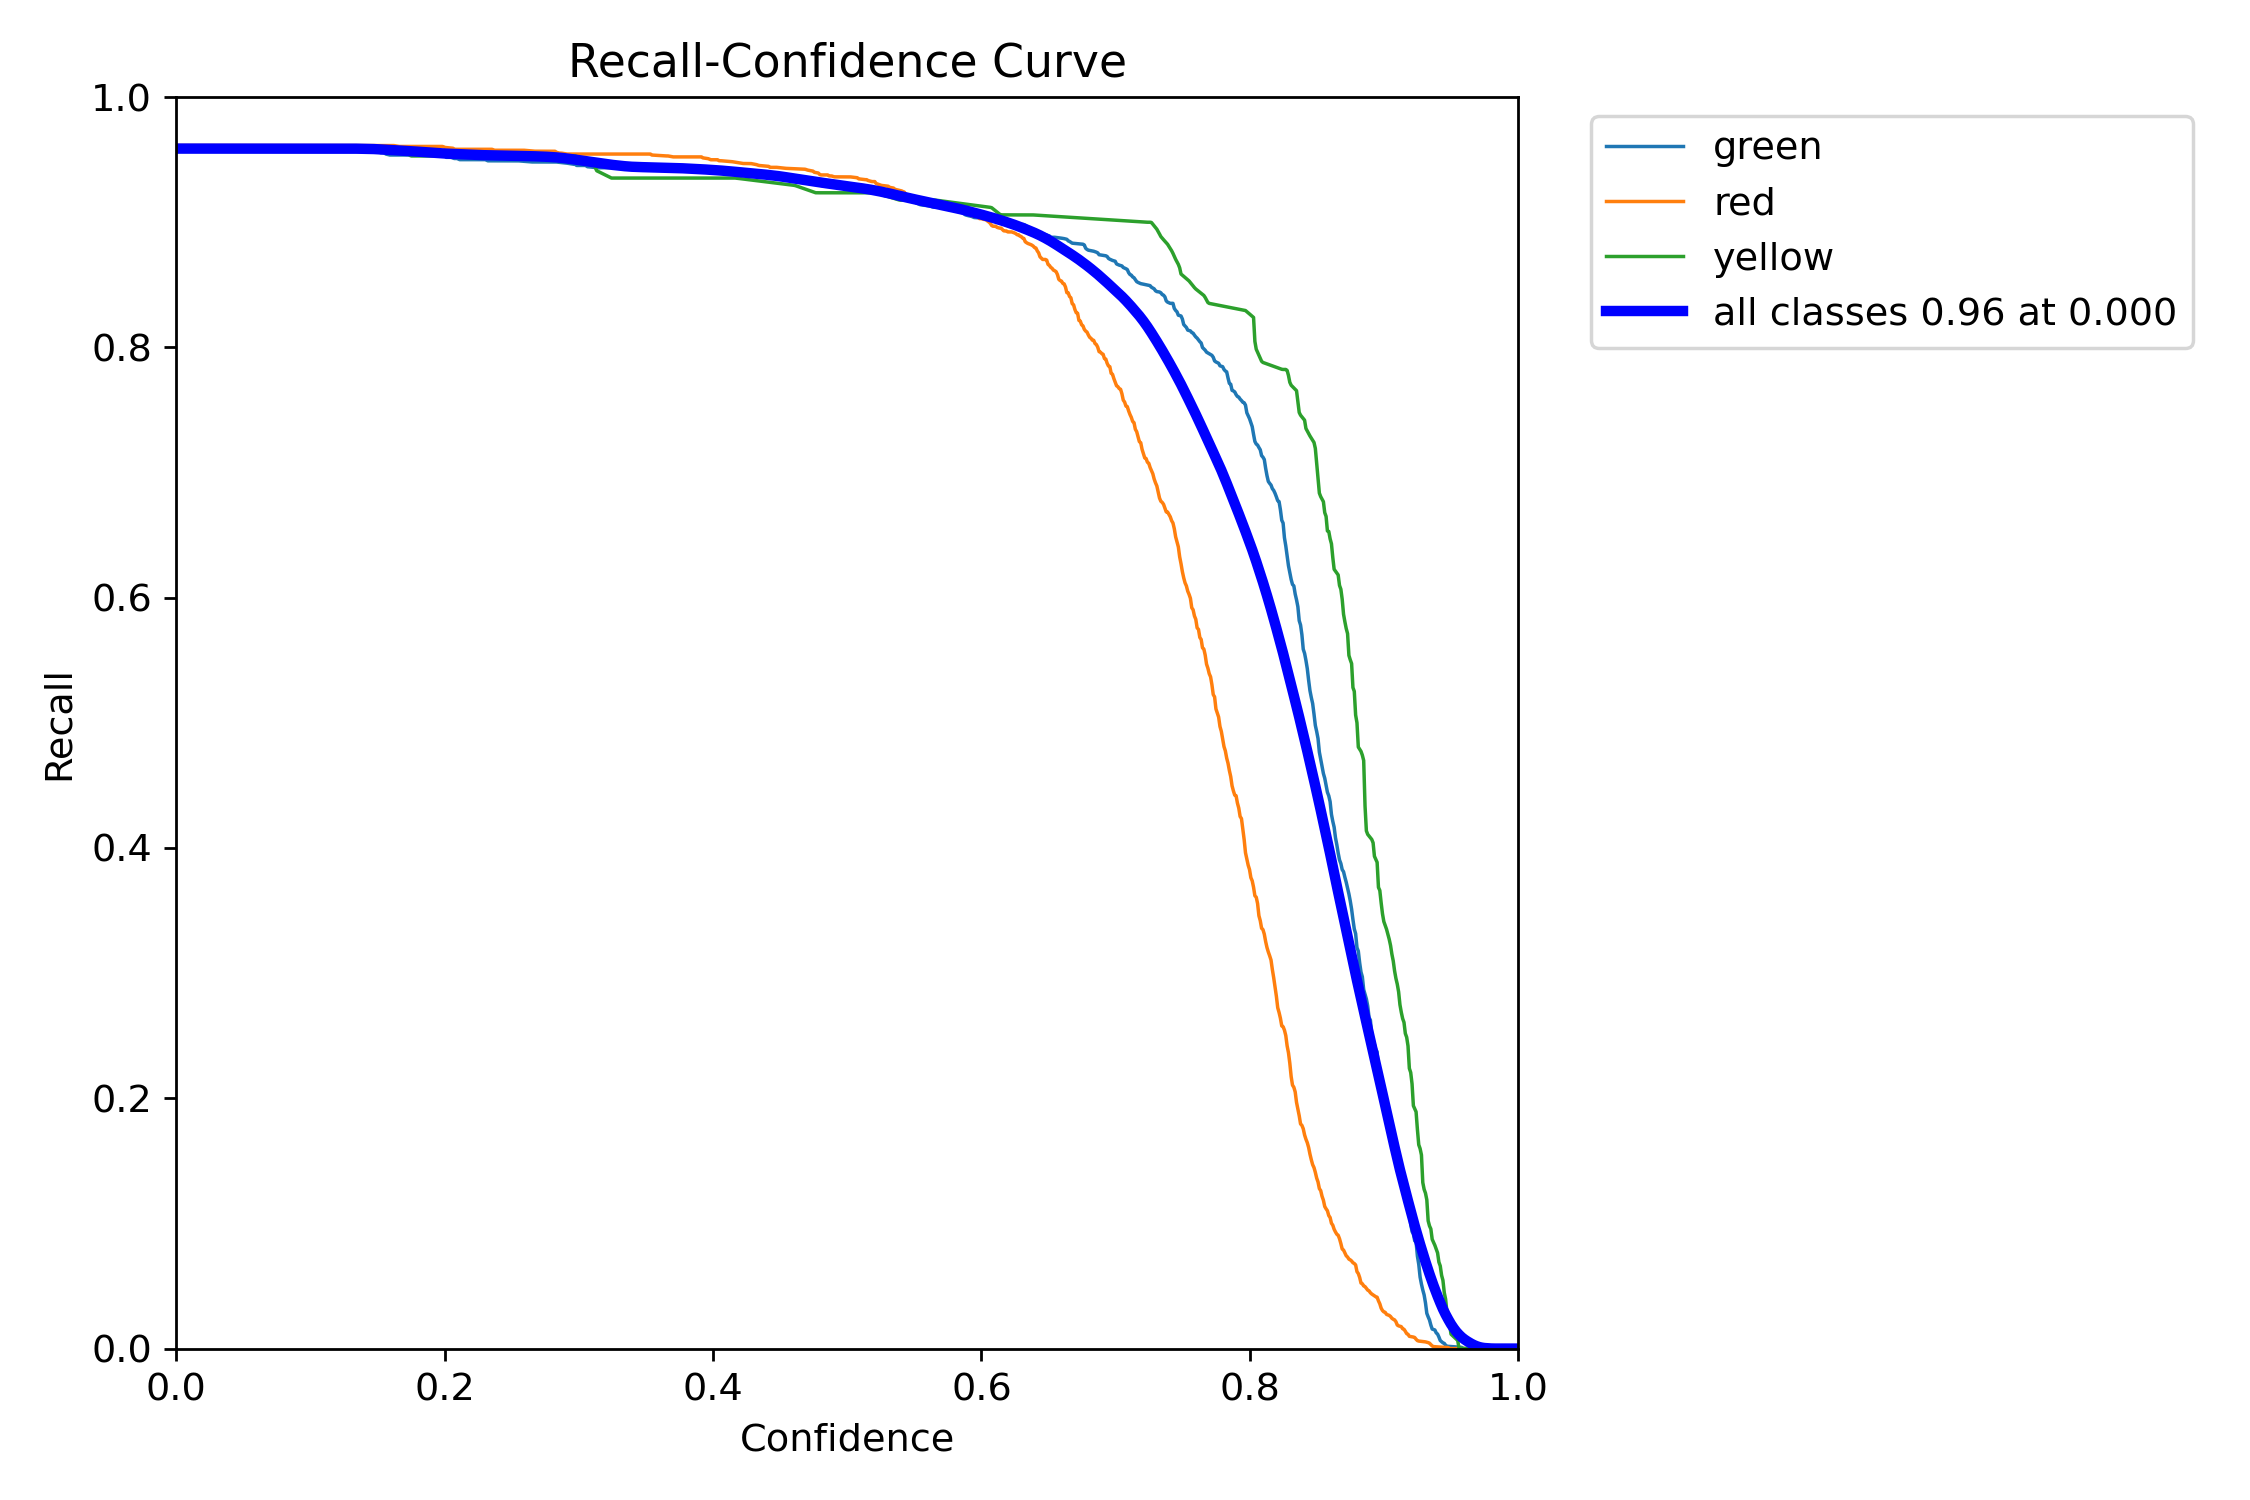

In [11]:
Image(filename='/kaggle/working/runs/detect/trianResult/R_curve.png', width=600)

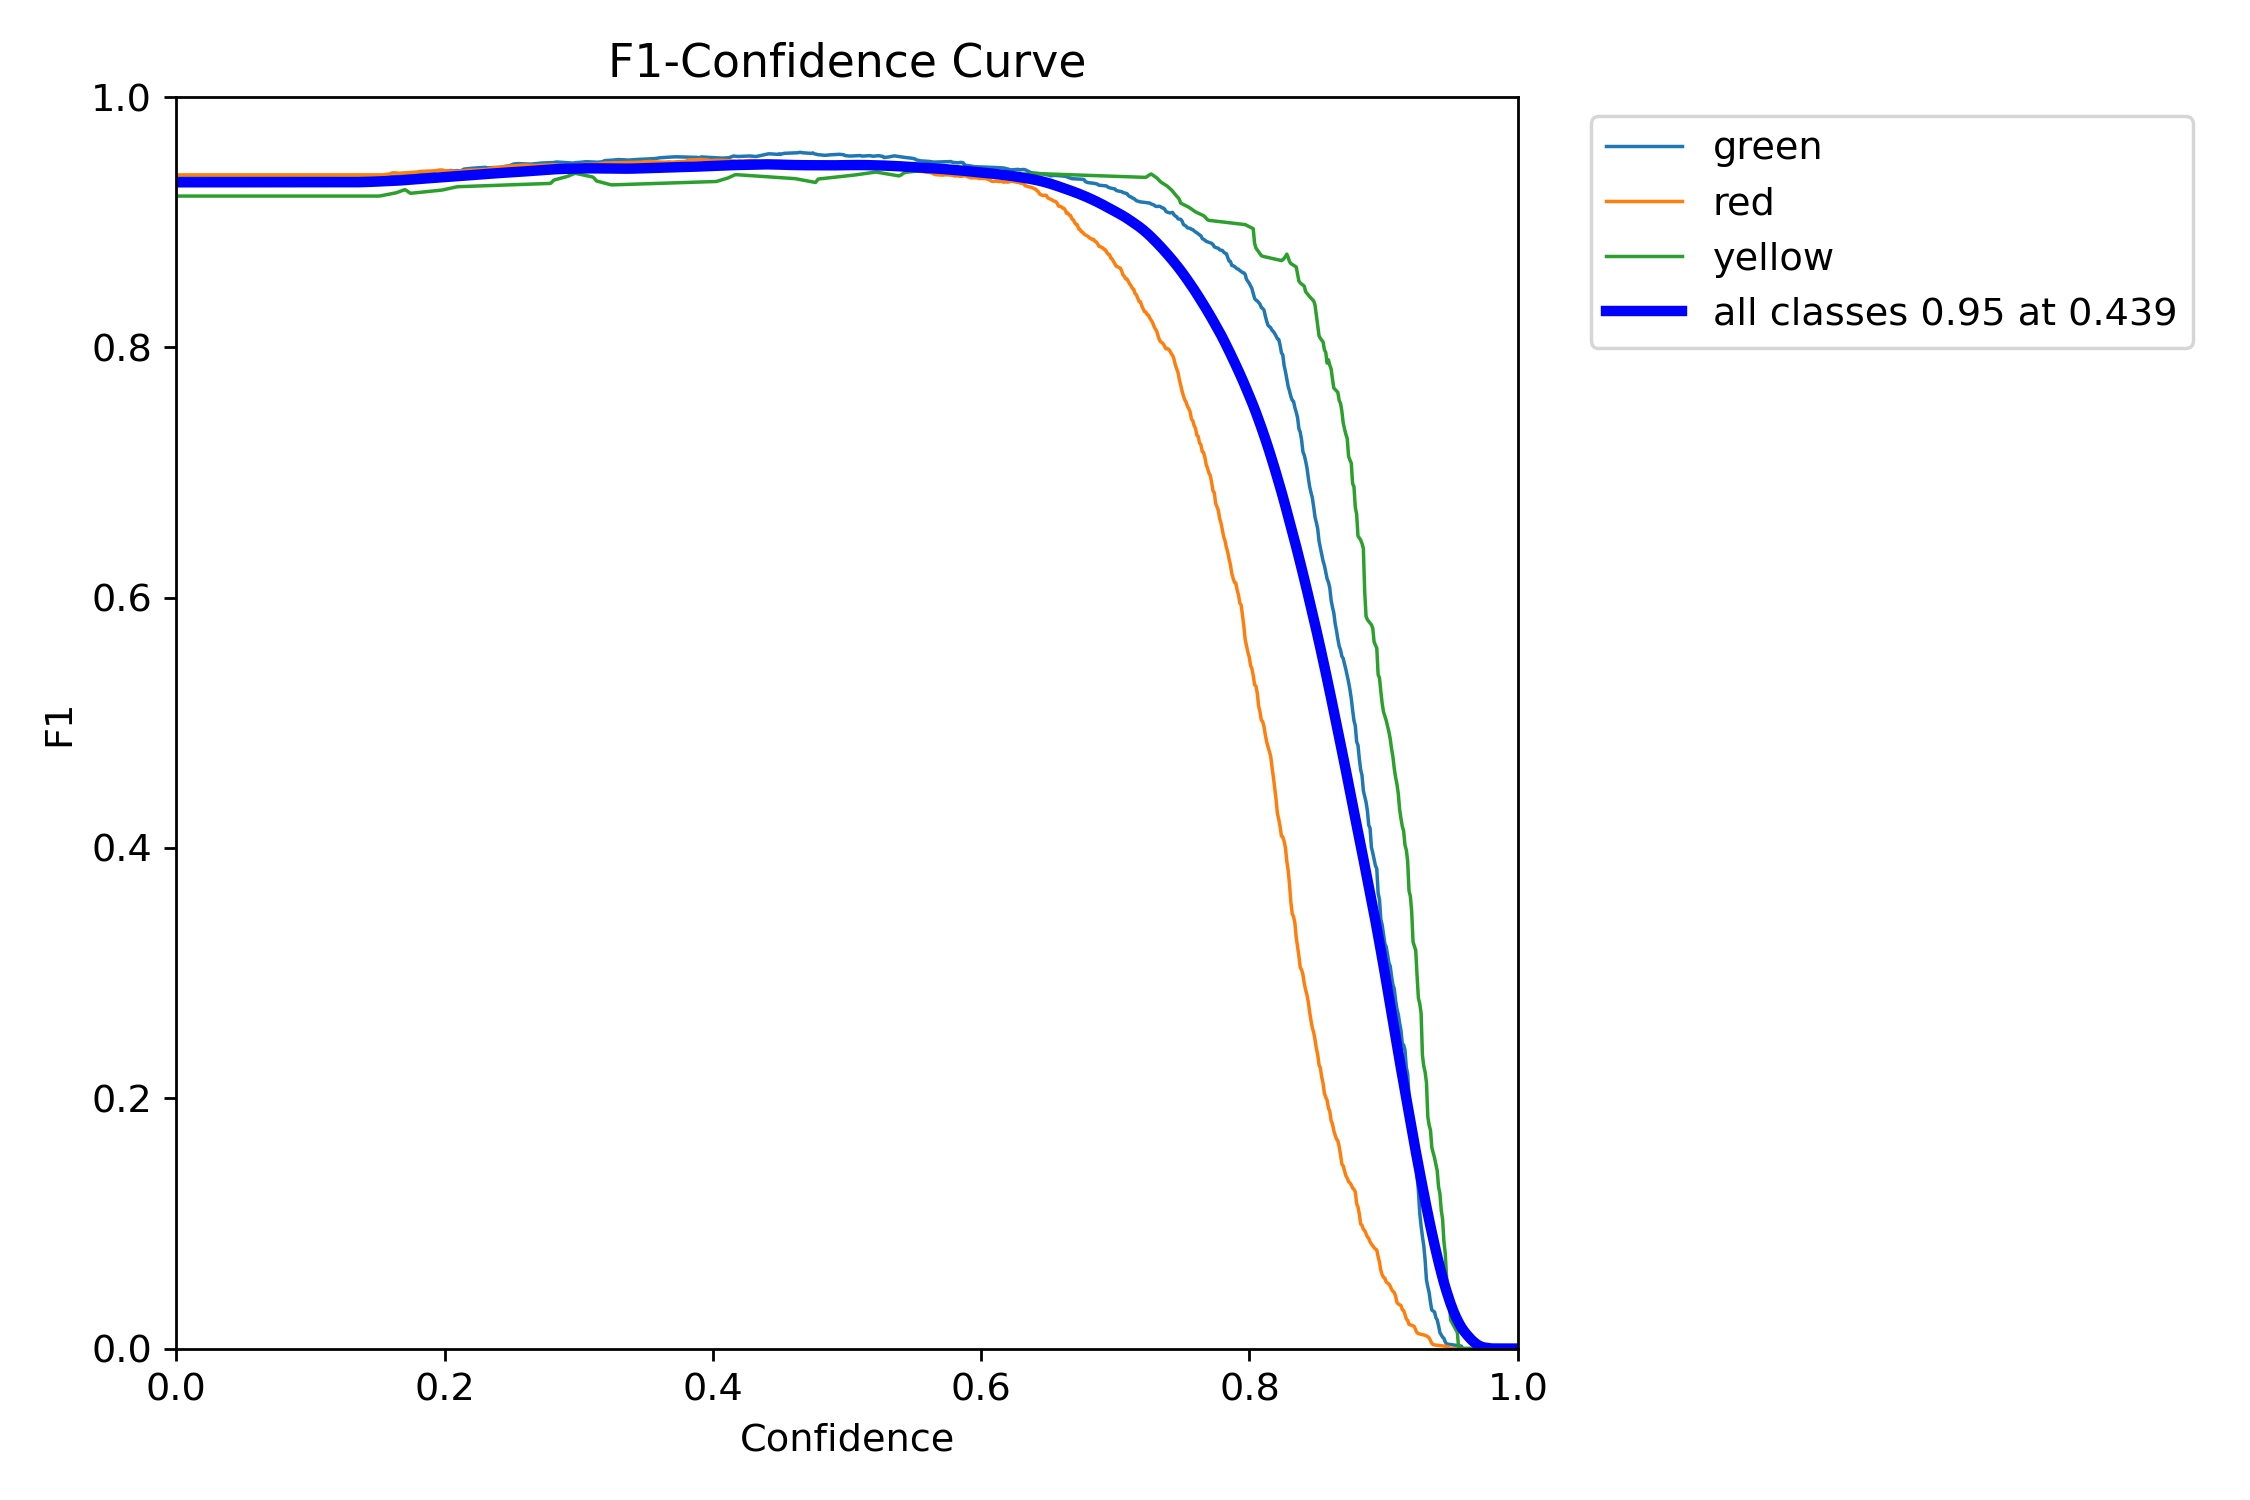

In [12]:
Image(filename='/kaggle/working/runs/detect/trianResult/F1_curve.png', width=600)

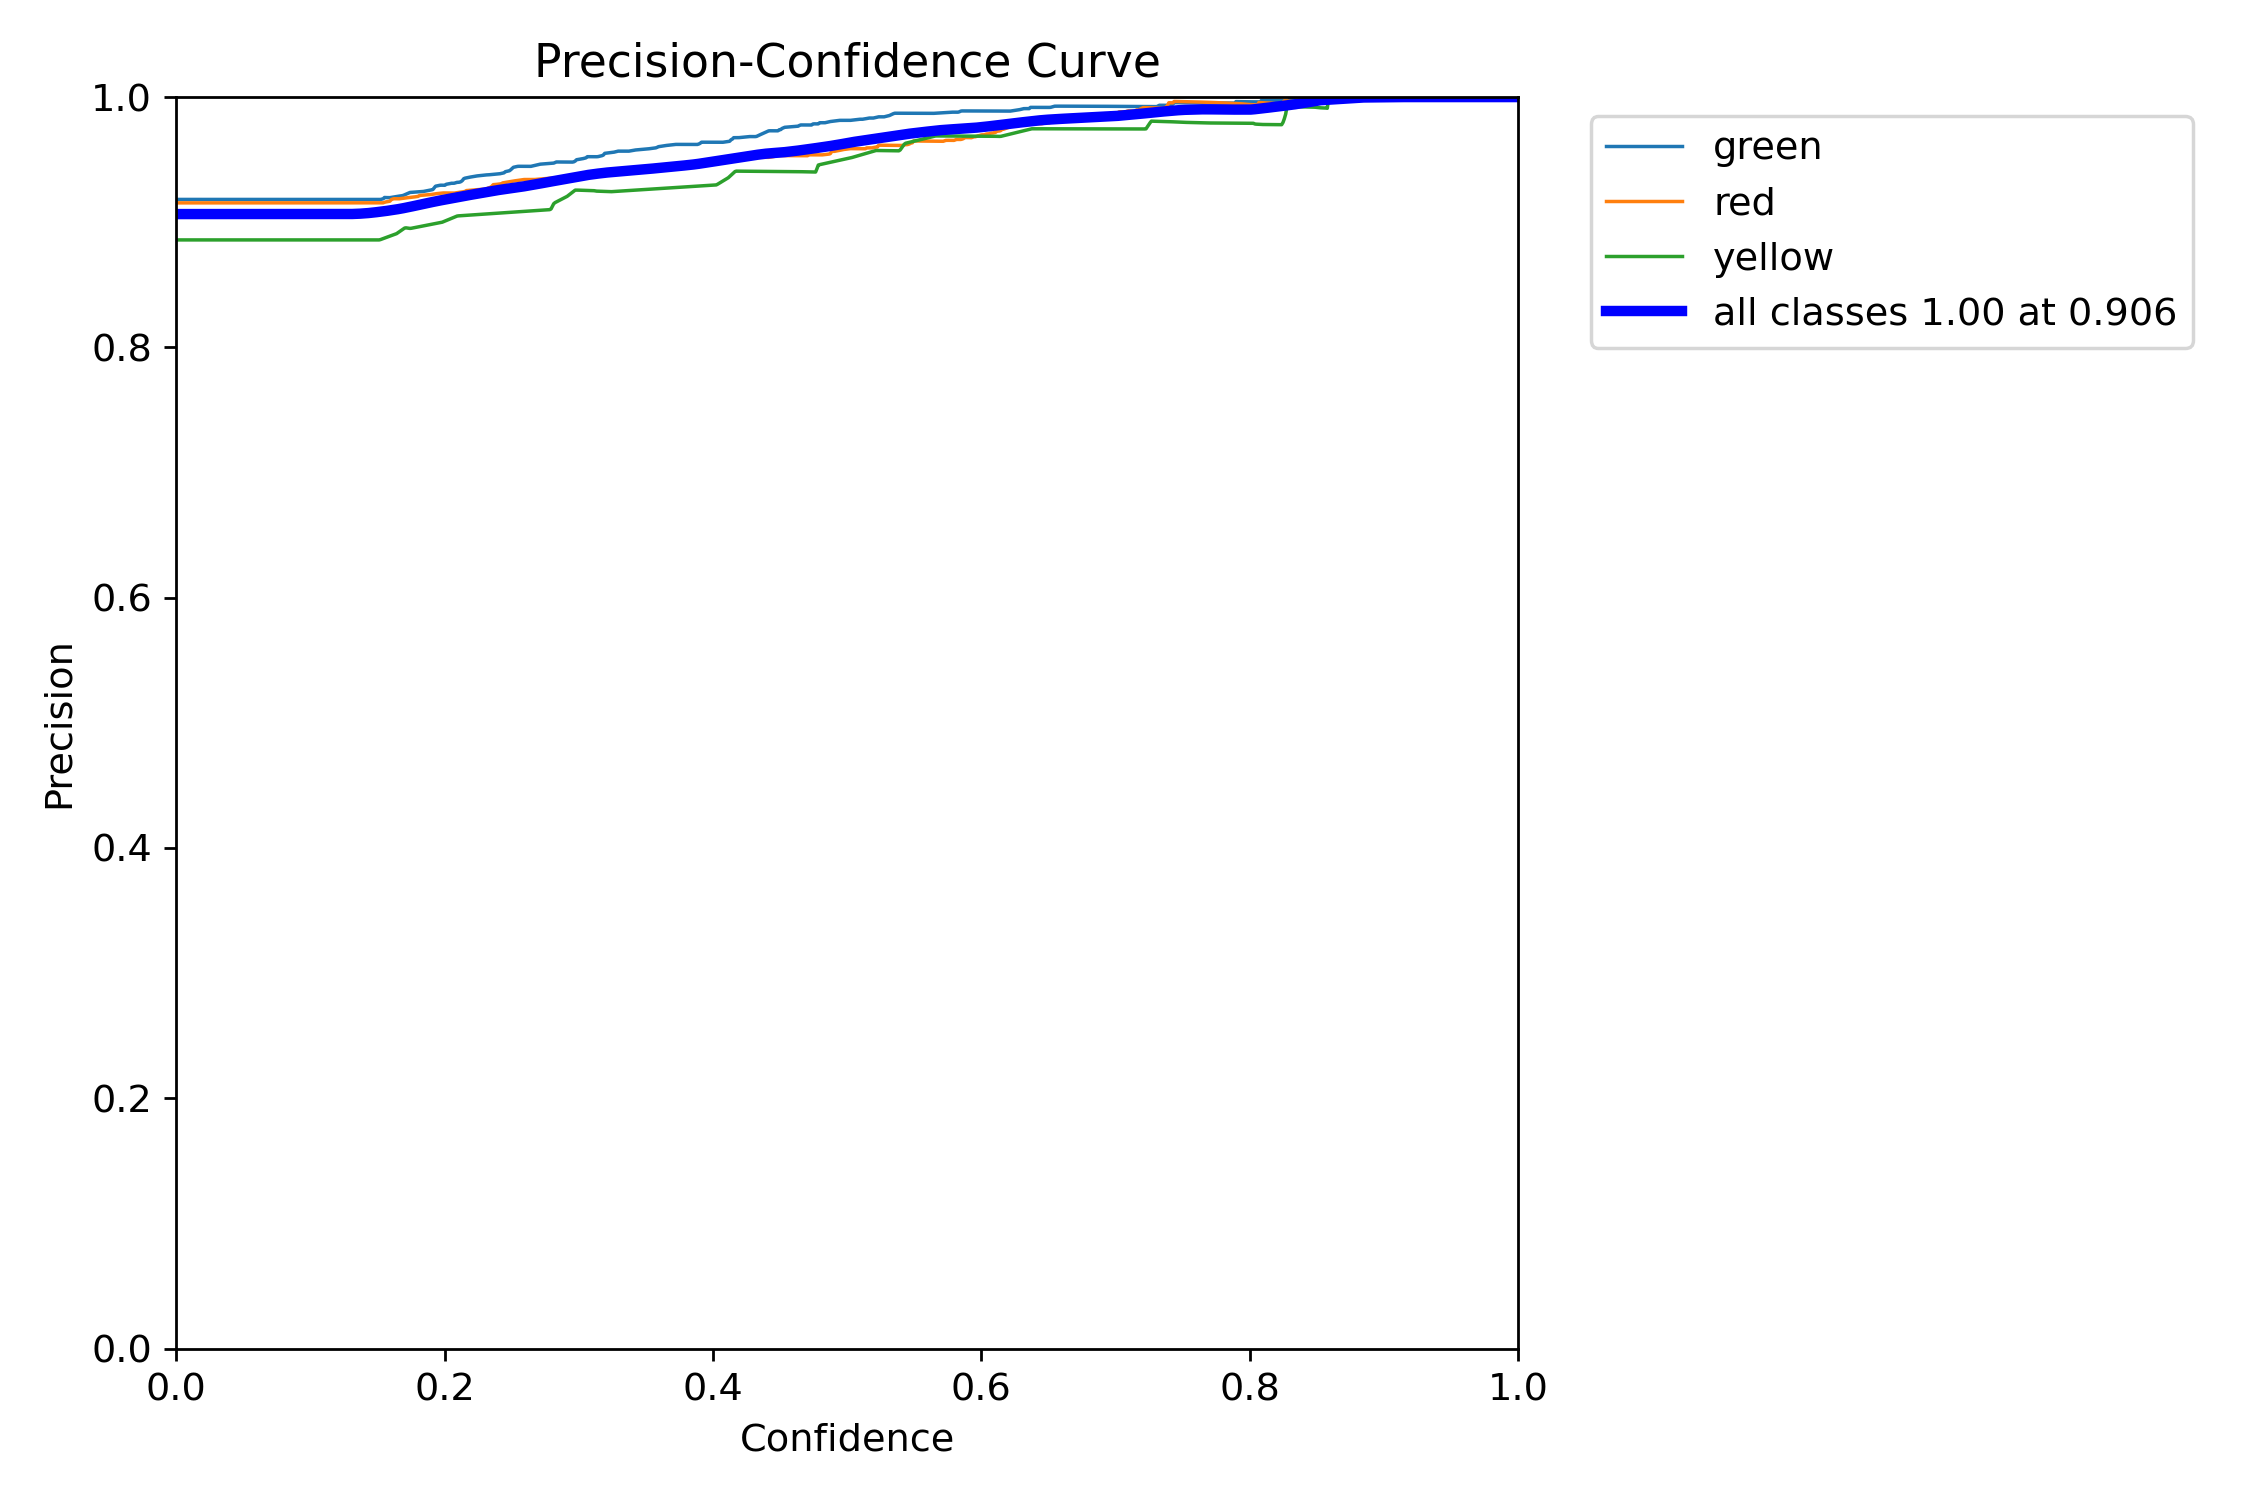

In [13]:
Image(filename='/kaggle/working/runs/detect/trianResult/P_curve.png', width=600)

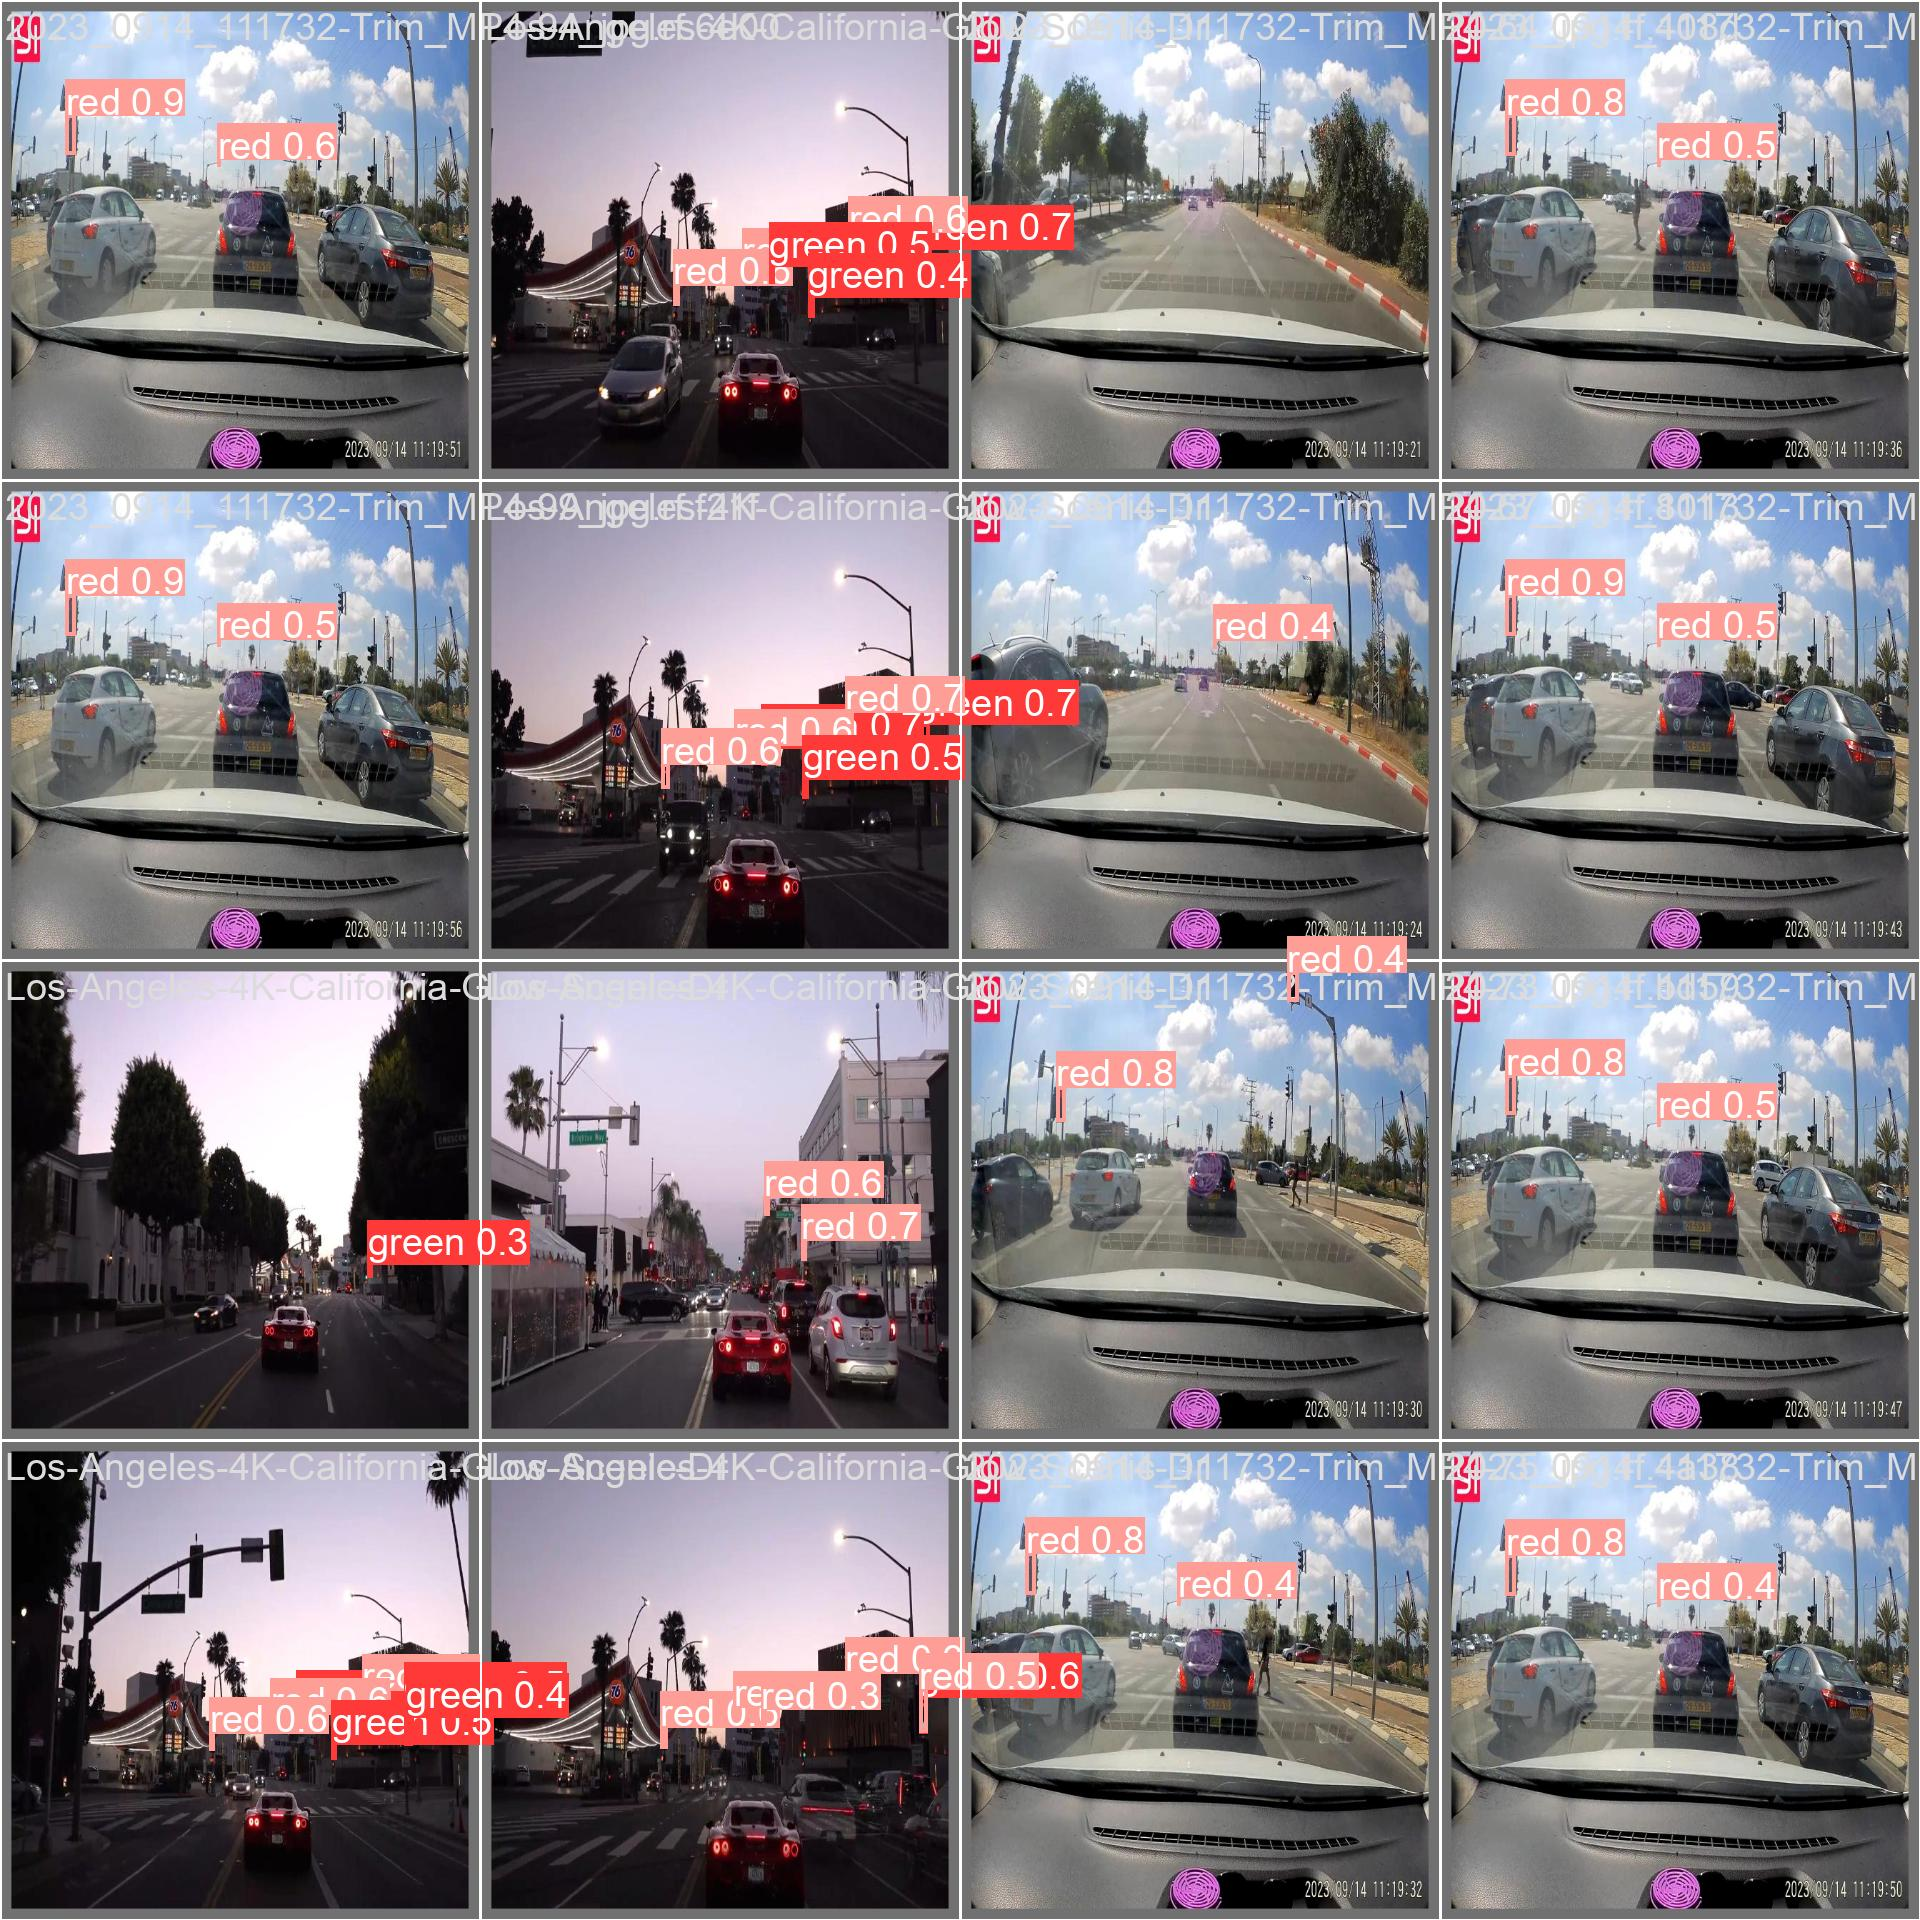

In [14]:
Image(filename='/kaggle/working/runs/detect/trianResult/val_batch1_pred.jpg', width=600)

In [15]:
!yolo task=detect mode=val model='/kaggle/working/runs/detect/trianResult/weights/best.pt' data={dataset.location}/data.yaml conf=0.25 epochs=20 imgsz=630 plots=True 

WARNING ⚠️ imgsz=[630] must be multiple of max stride 32, updating to [640]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/traffic-lights-3/valid/labels.cache... 1755 images
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1755       2568      0.957      0.936       0.97      0.773
                 green       1755       1080      0.979      0.936      0.972      0.798
                   red       1755       1318      0.953      0.943       0.97      0.691
                yellow       1755        170       0.94      0.928      0.968      0.829
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


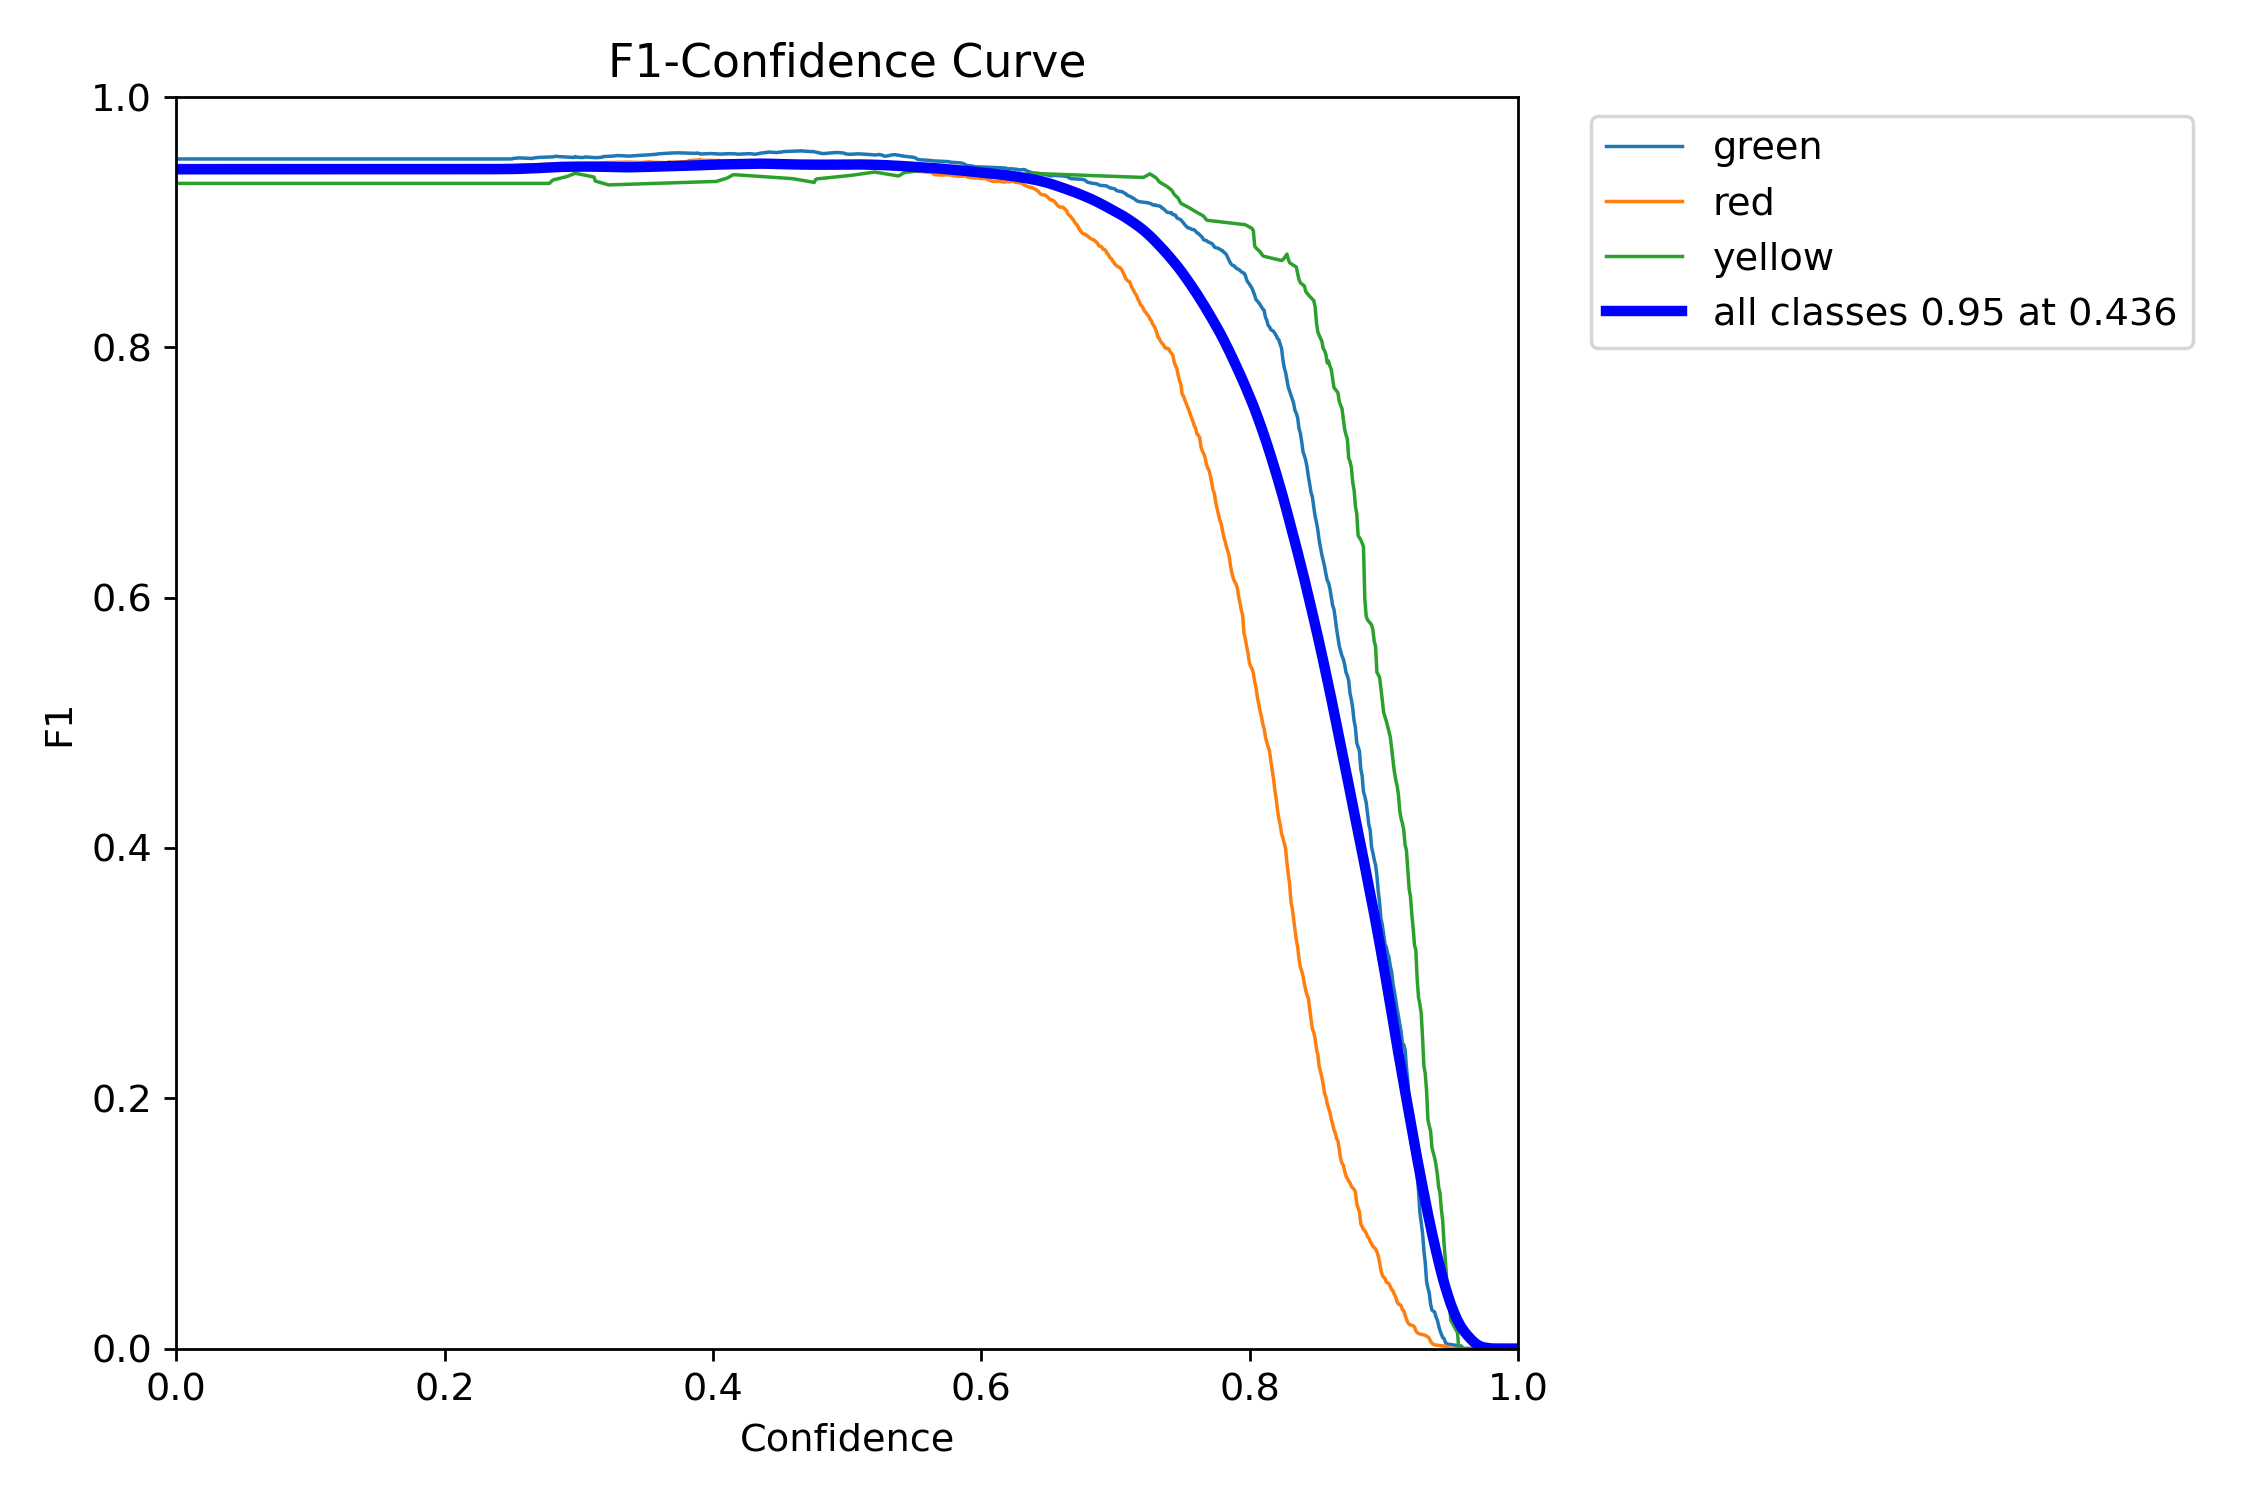

In [22]:
Image(filename='/kaggle/working/runs/detect/val/F1_curve.png', width=600)

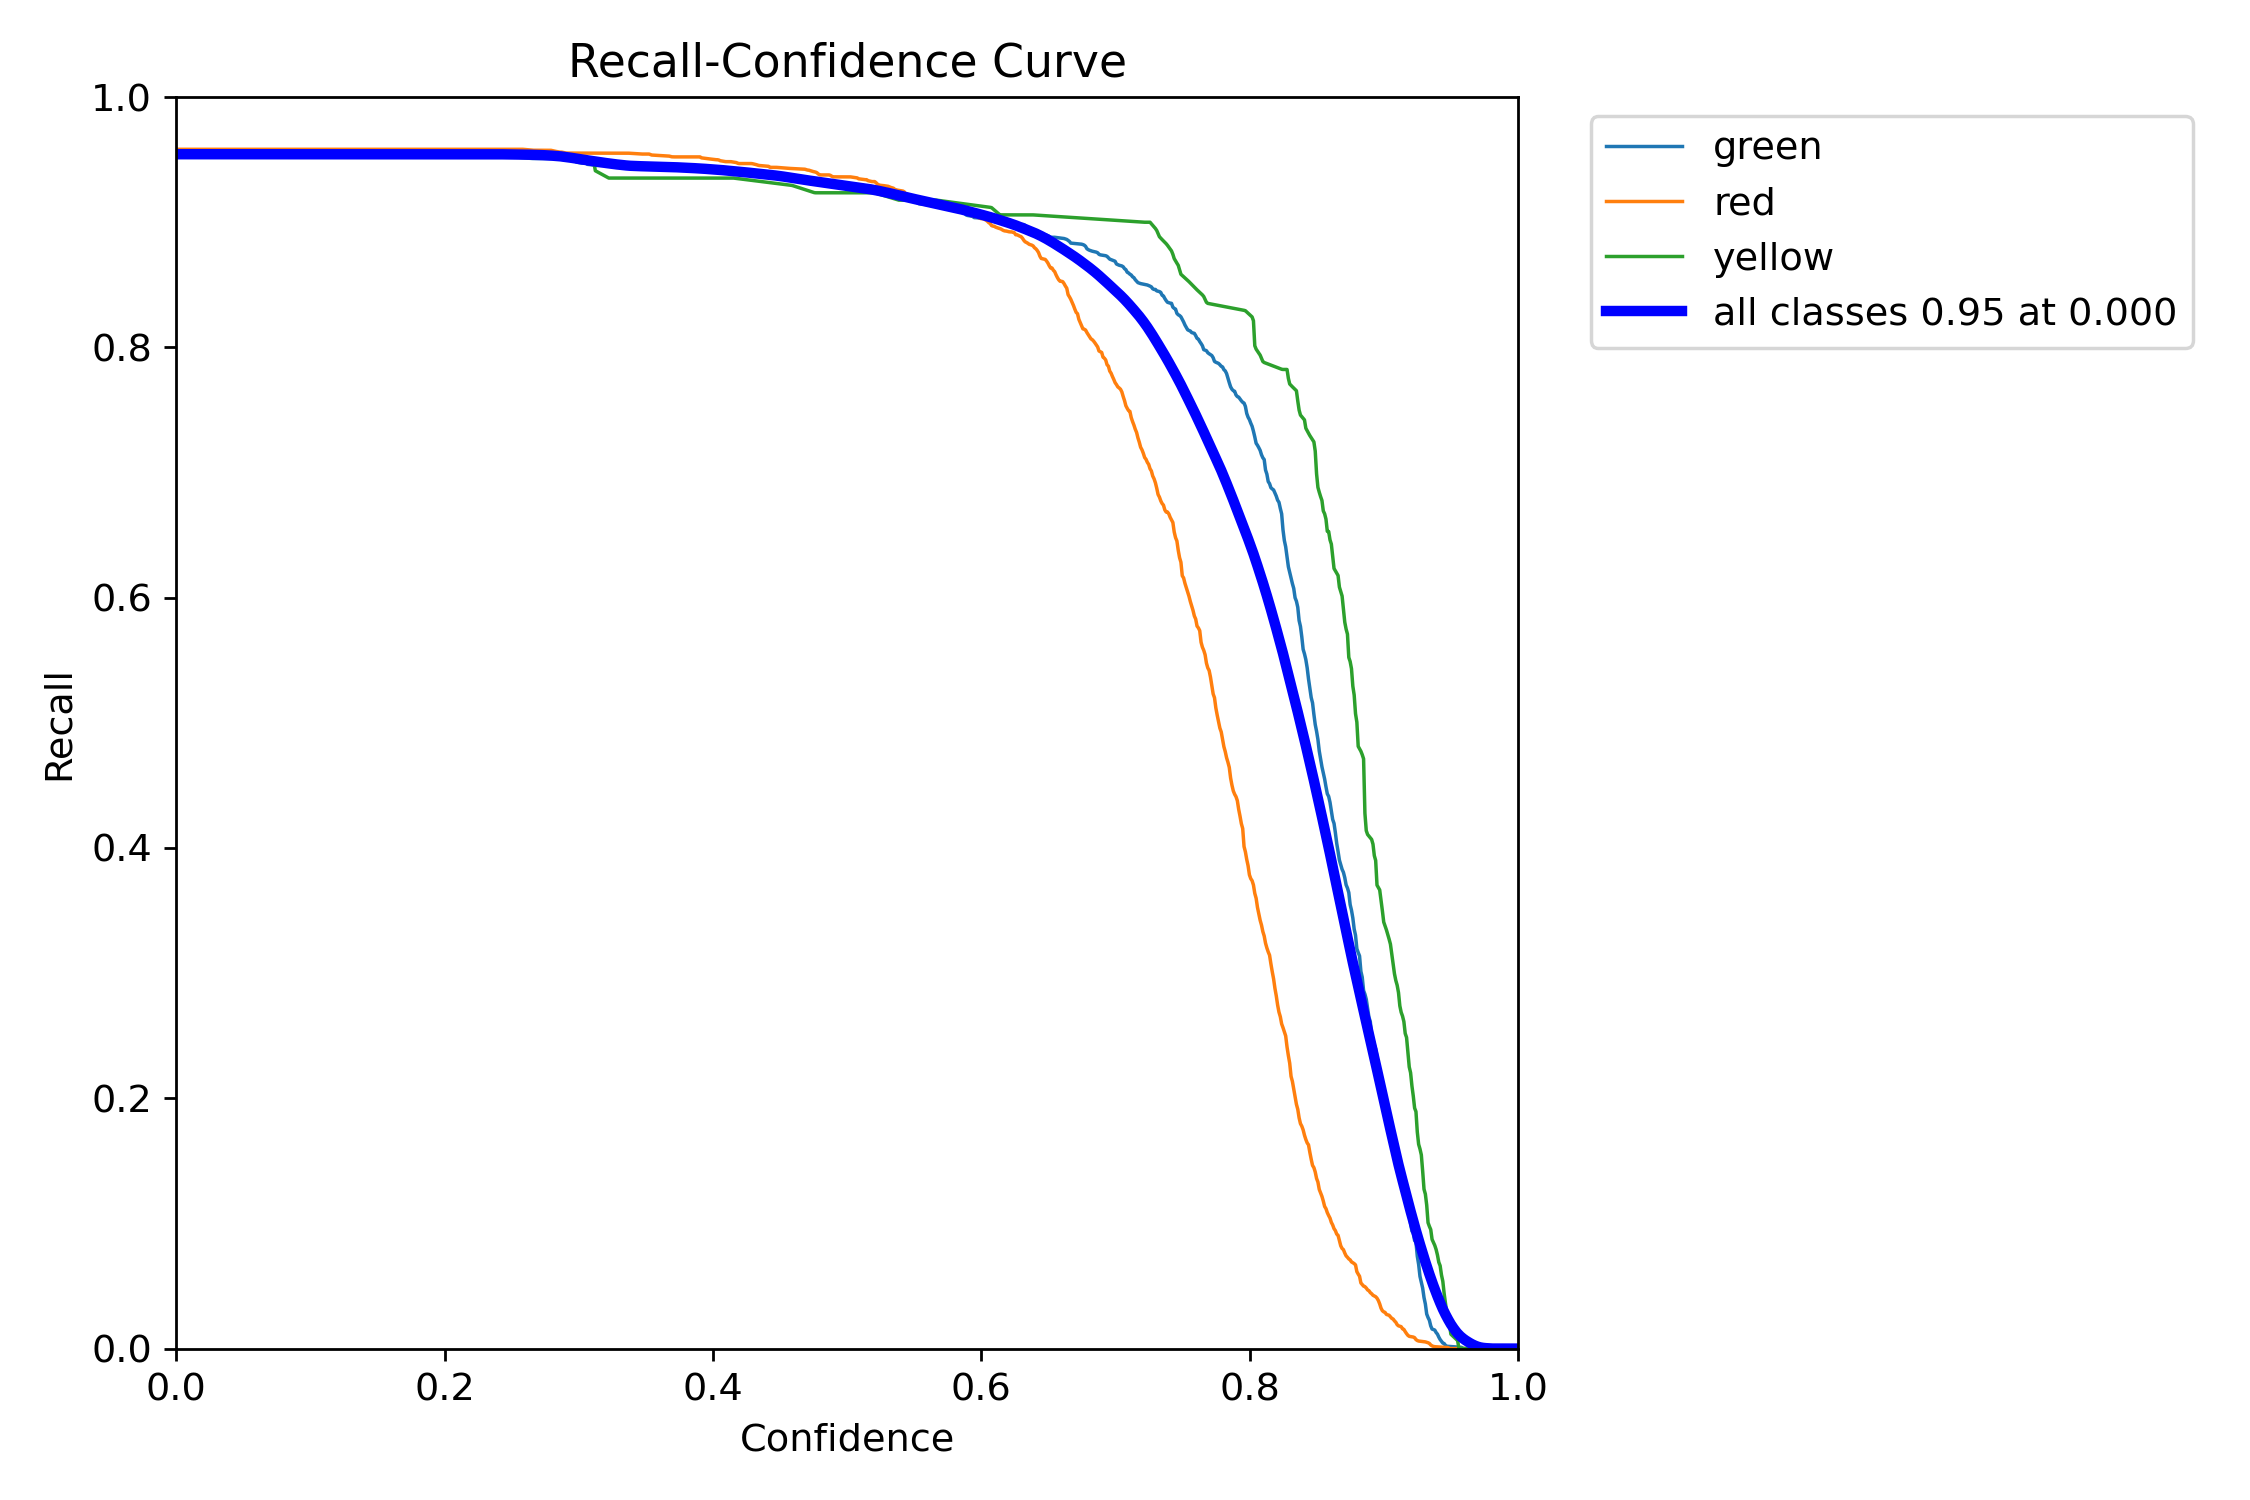

In [23]:
Image(filename='/kaggle/working/runs/detect/val/R_curve.png', width=600)

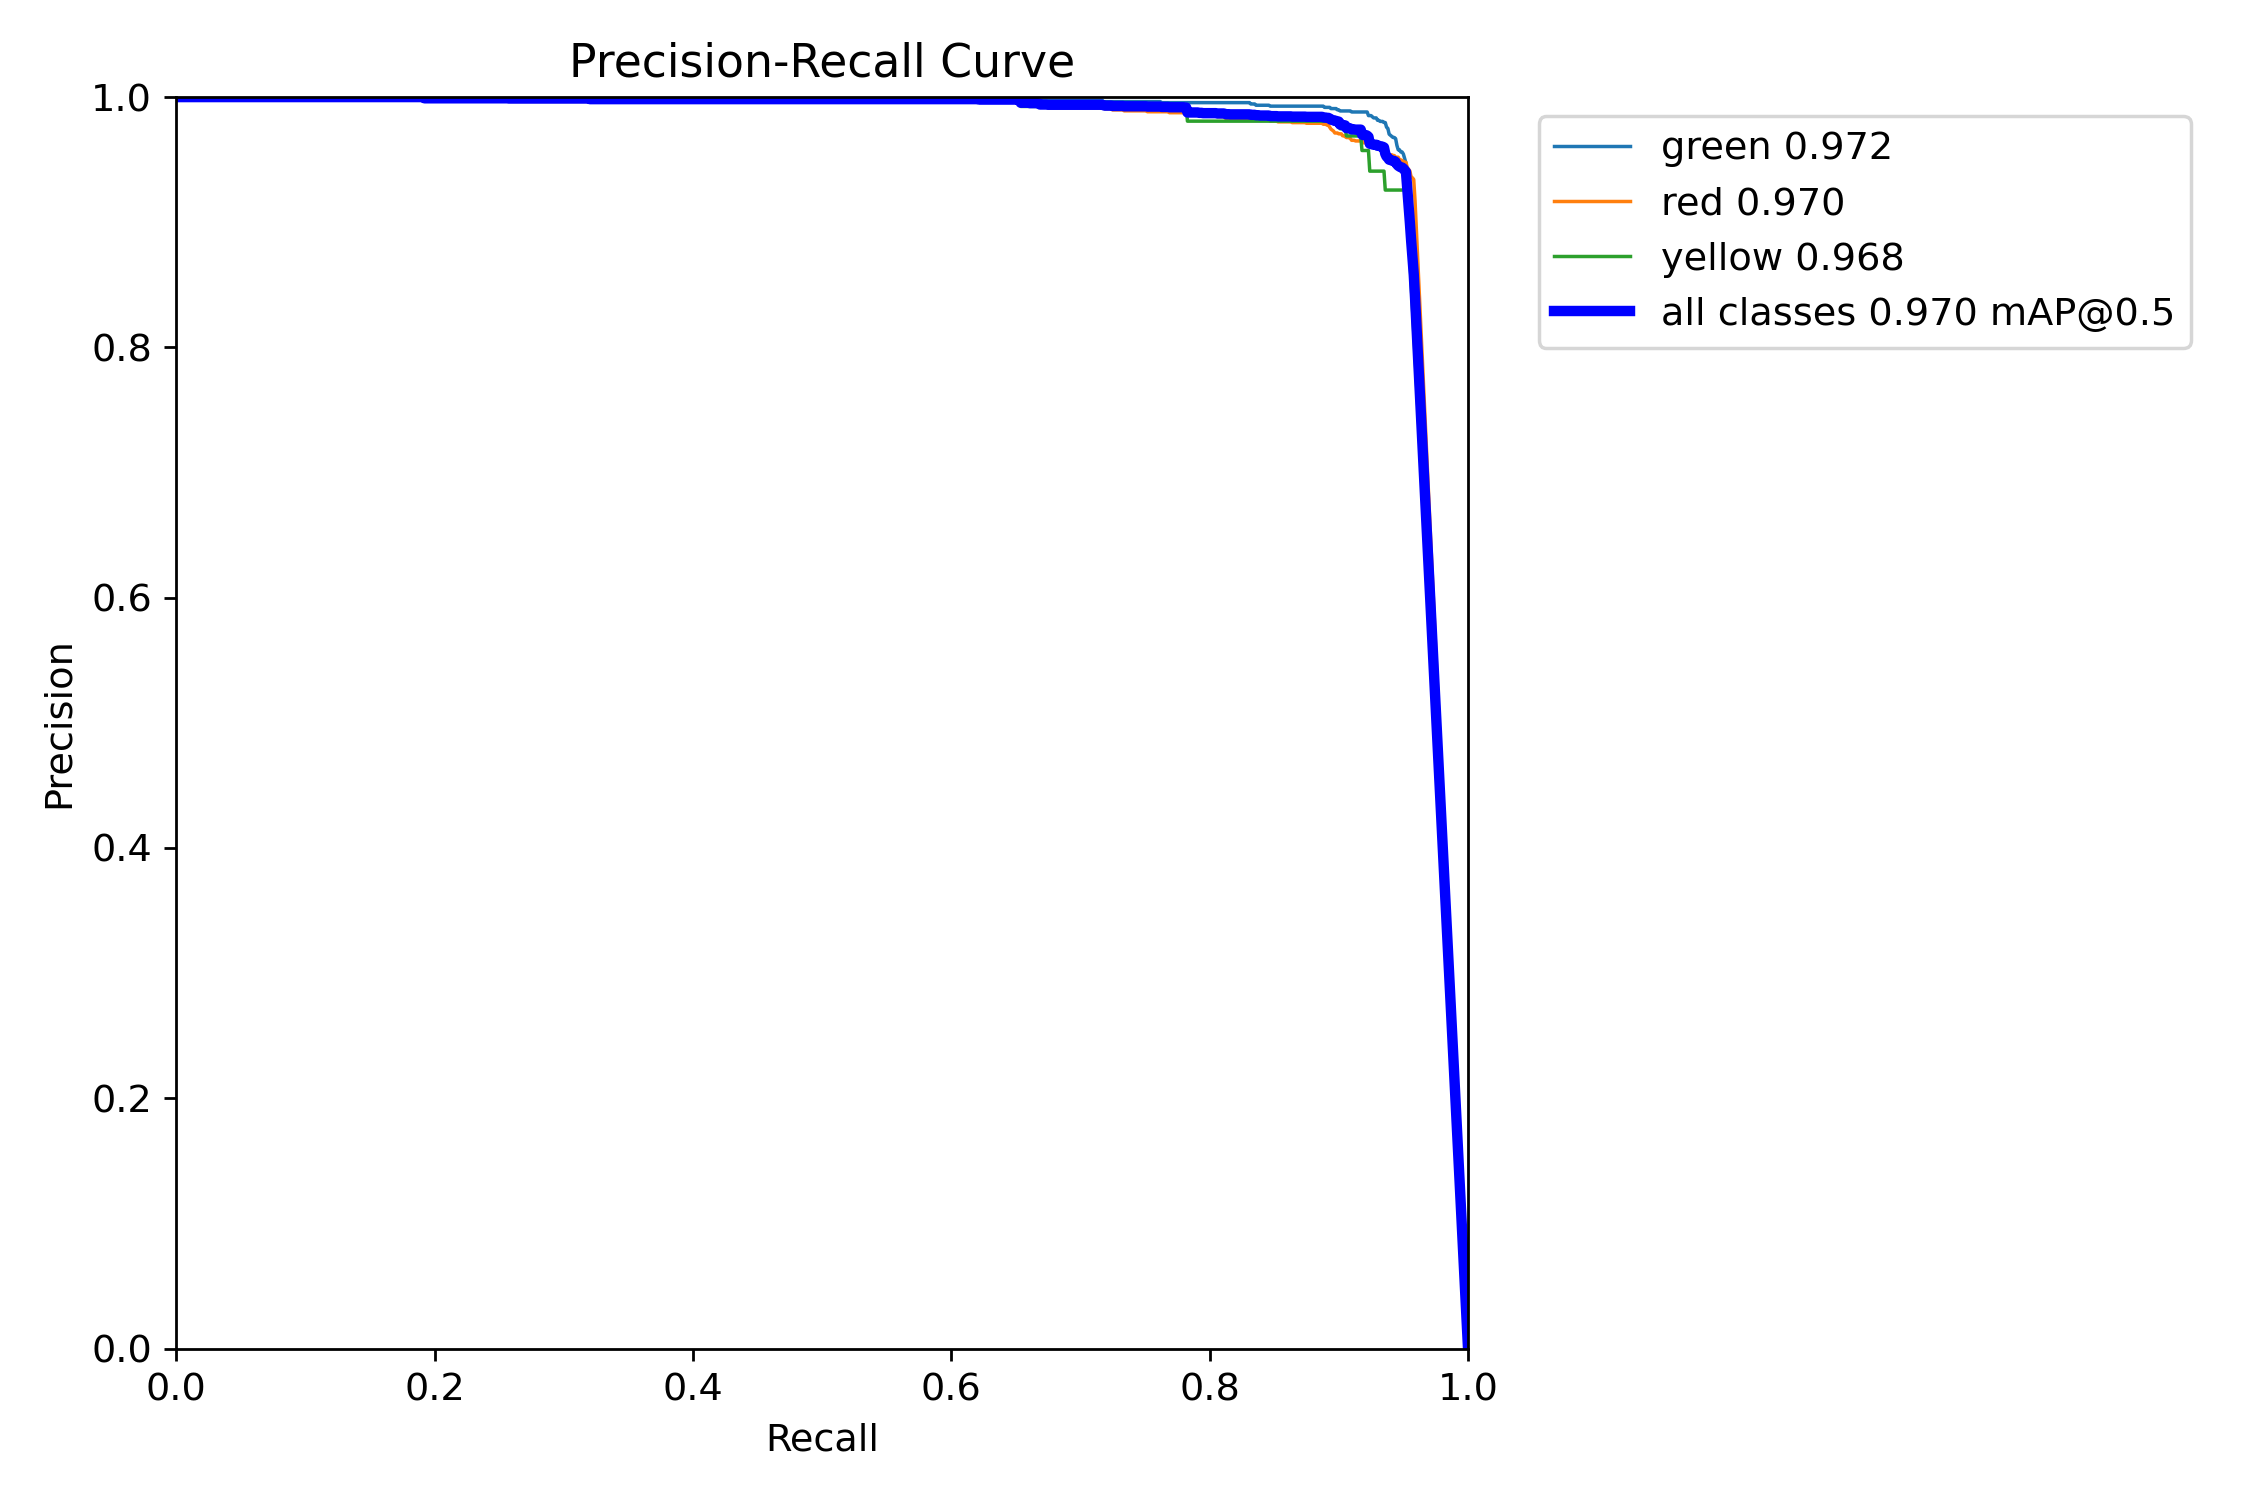

In [24]:
Image(filename='/kaggle/working/runs/detect/val/PR_curve.png', width=600)

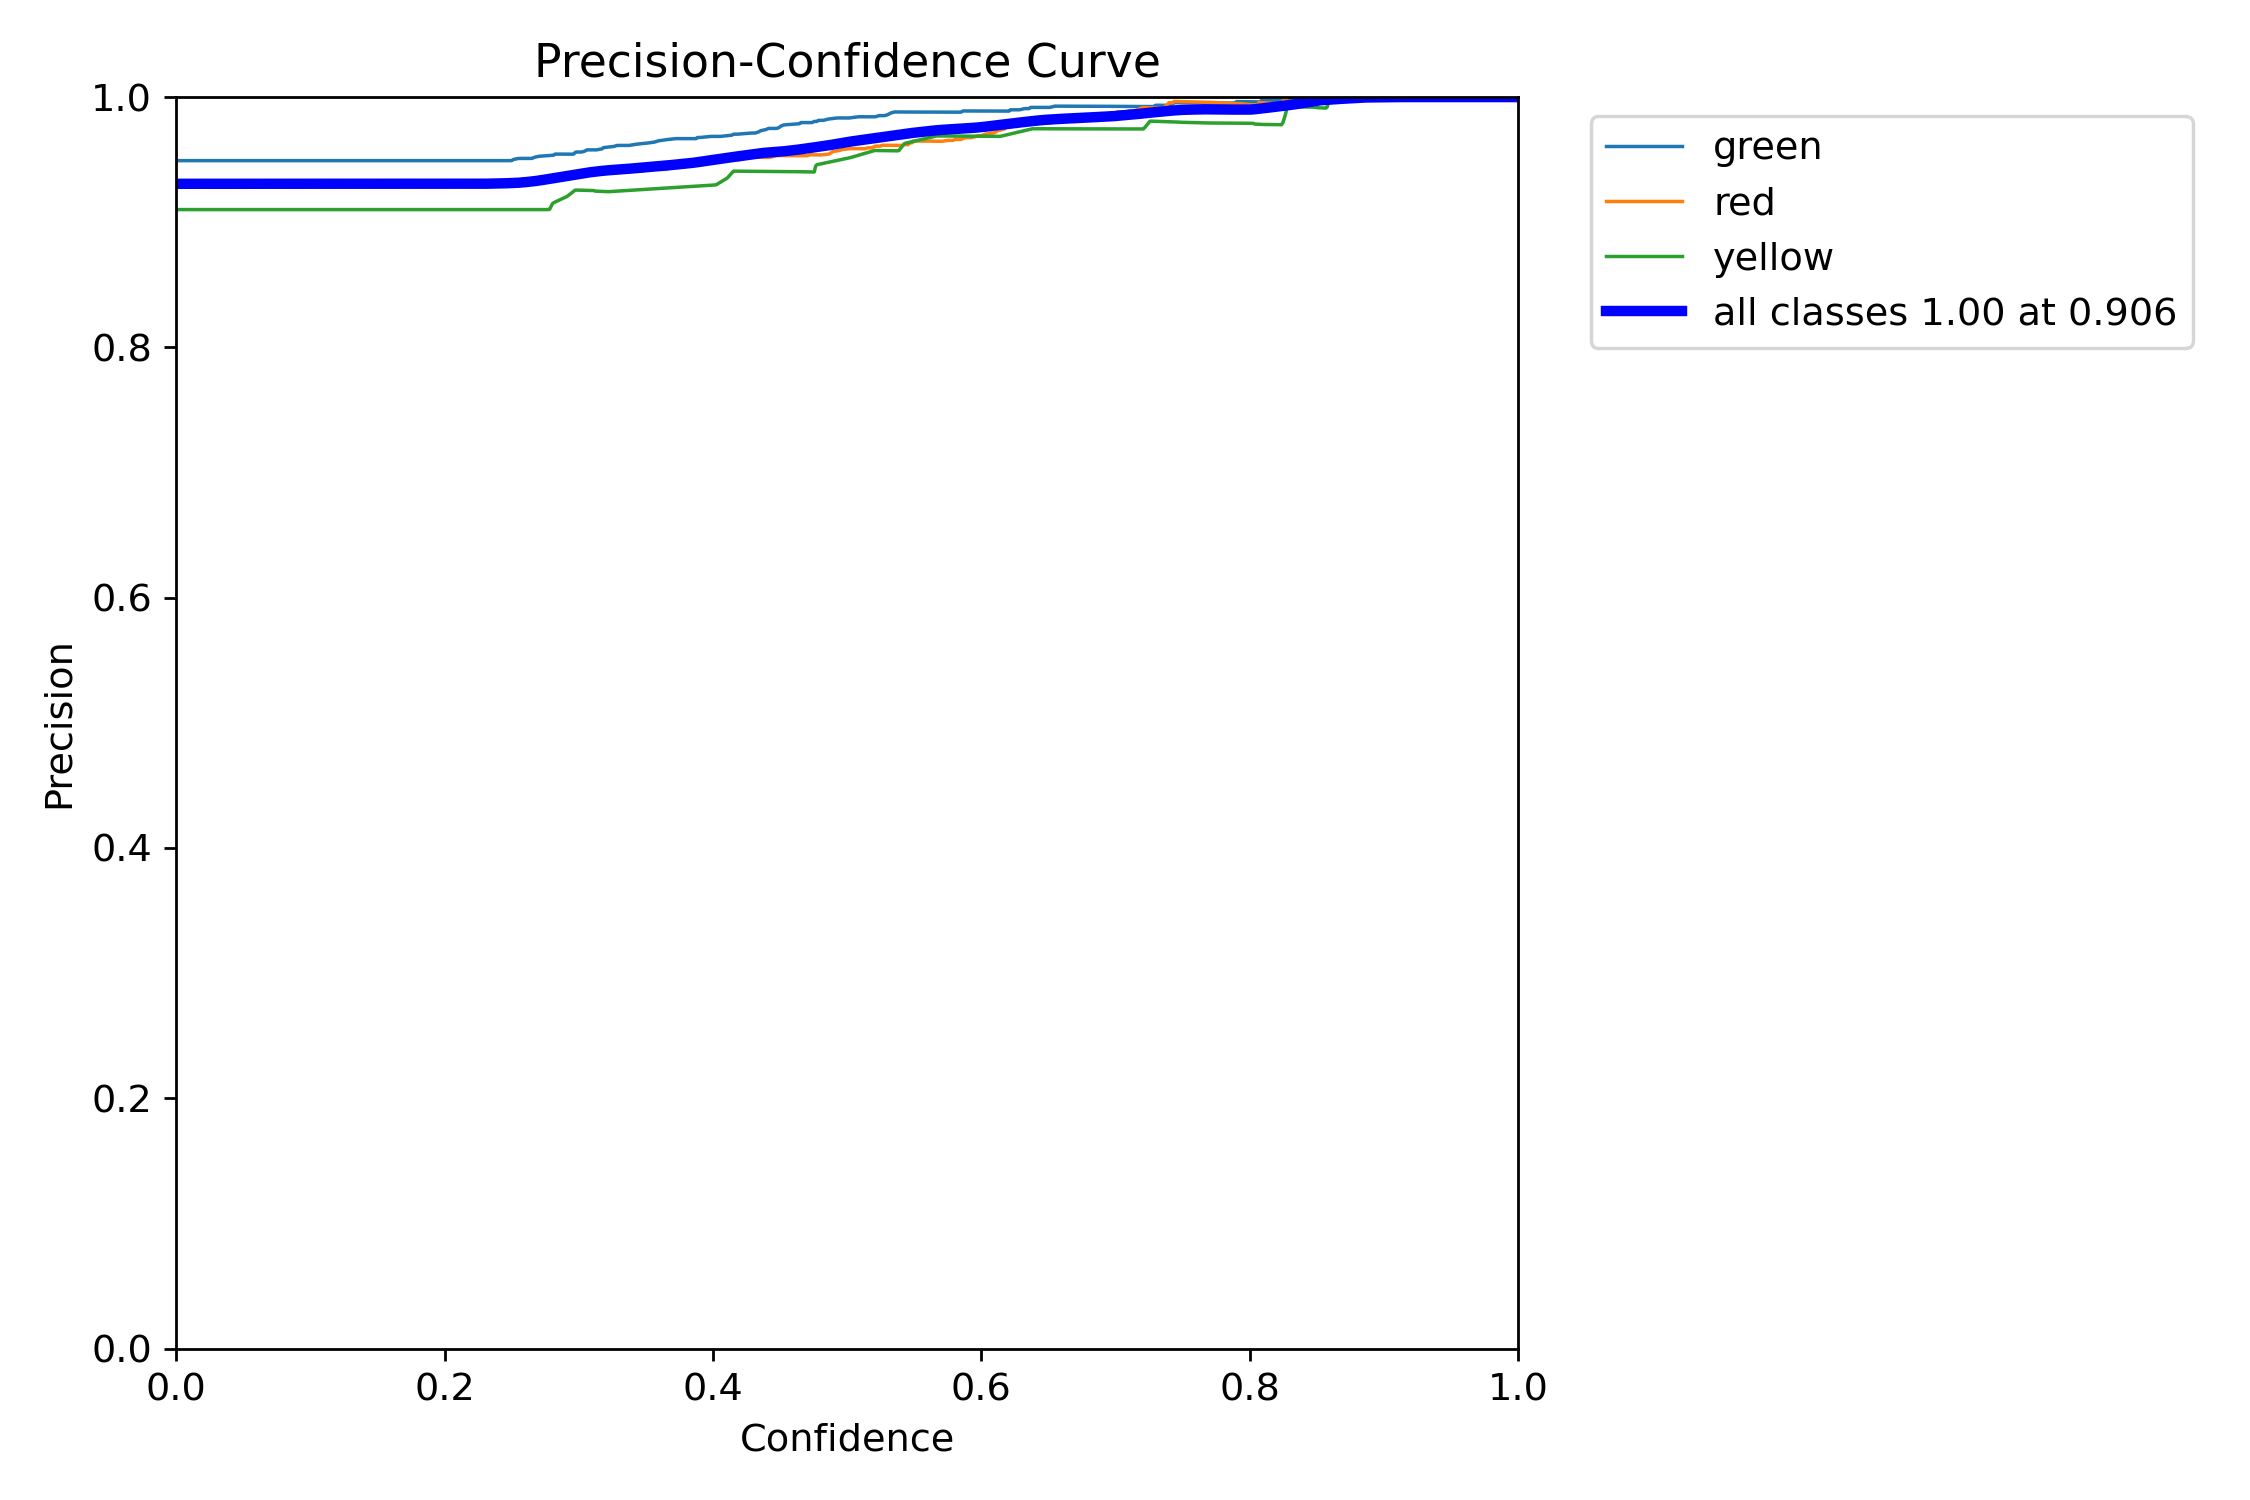

In [25]:
Image(filename='/kaggle/working/runs/detect/val/P_curve.png', width=600)

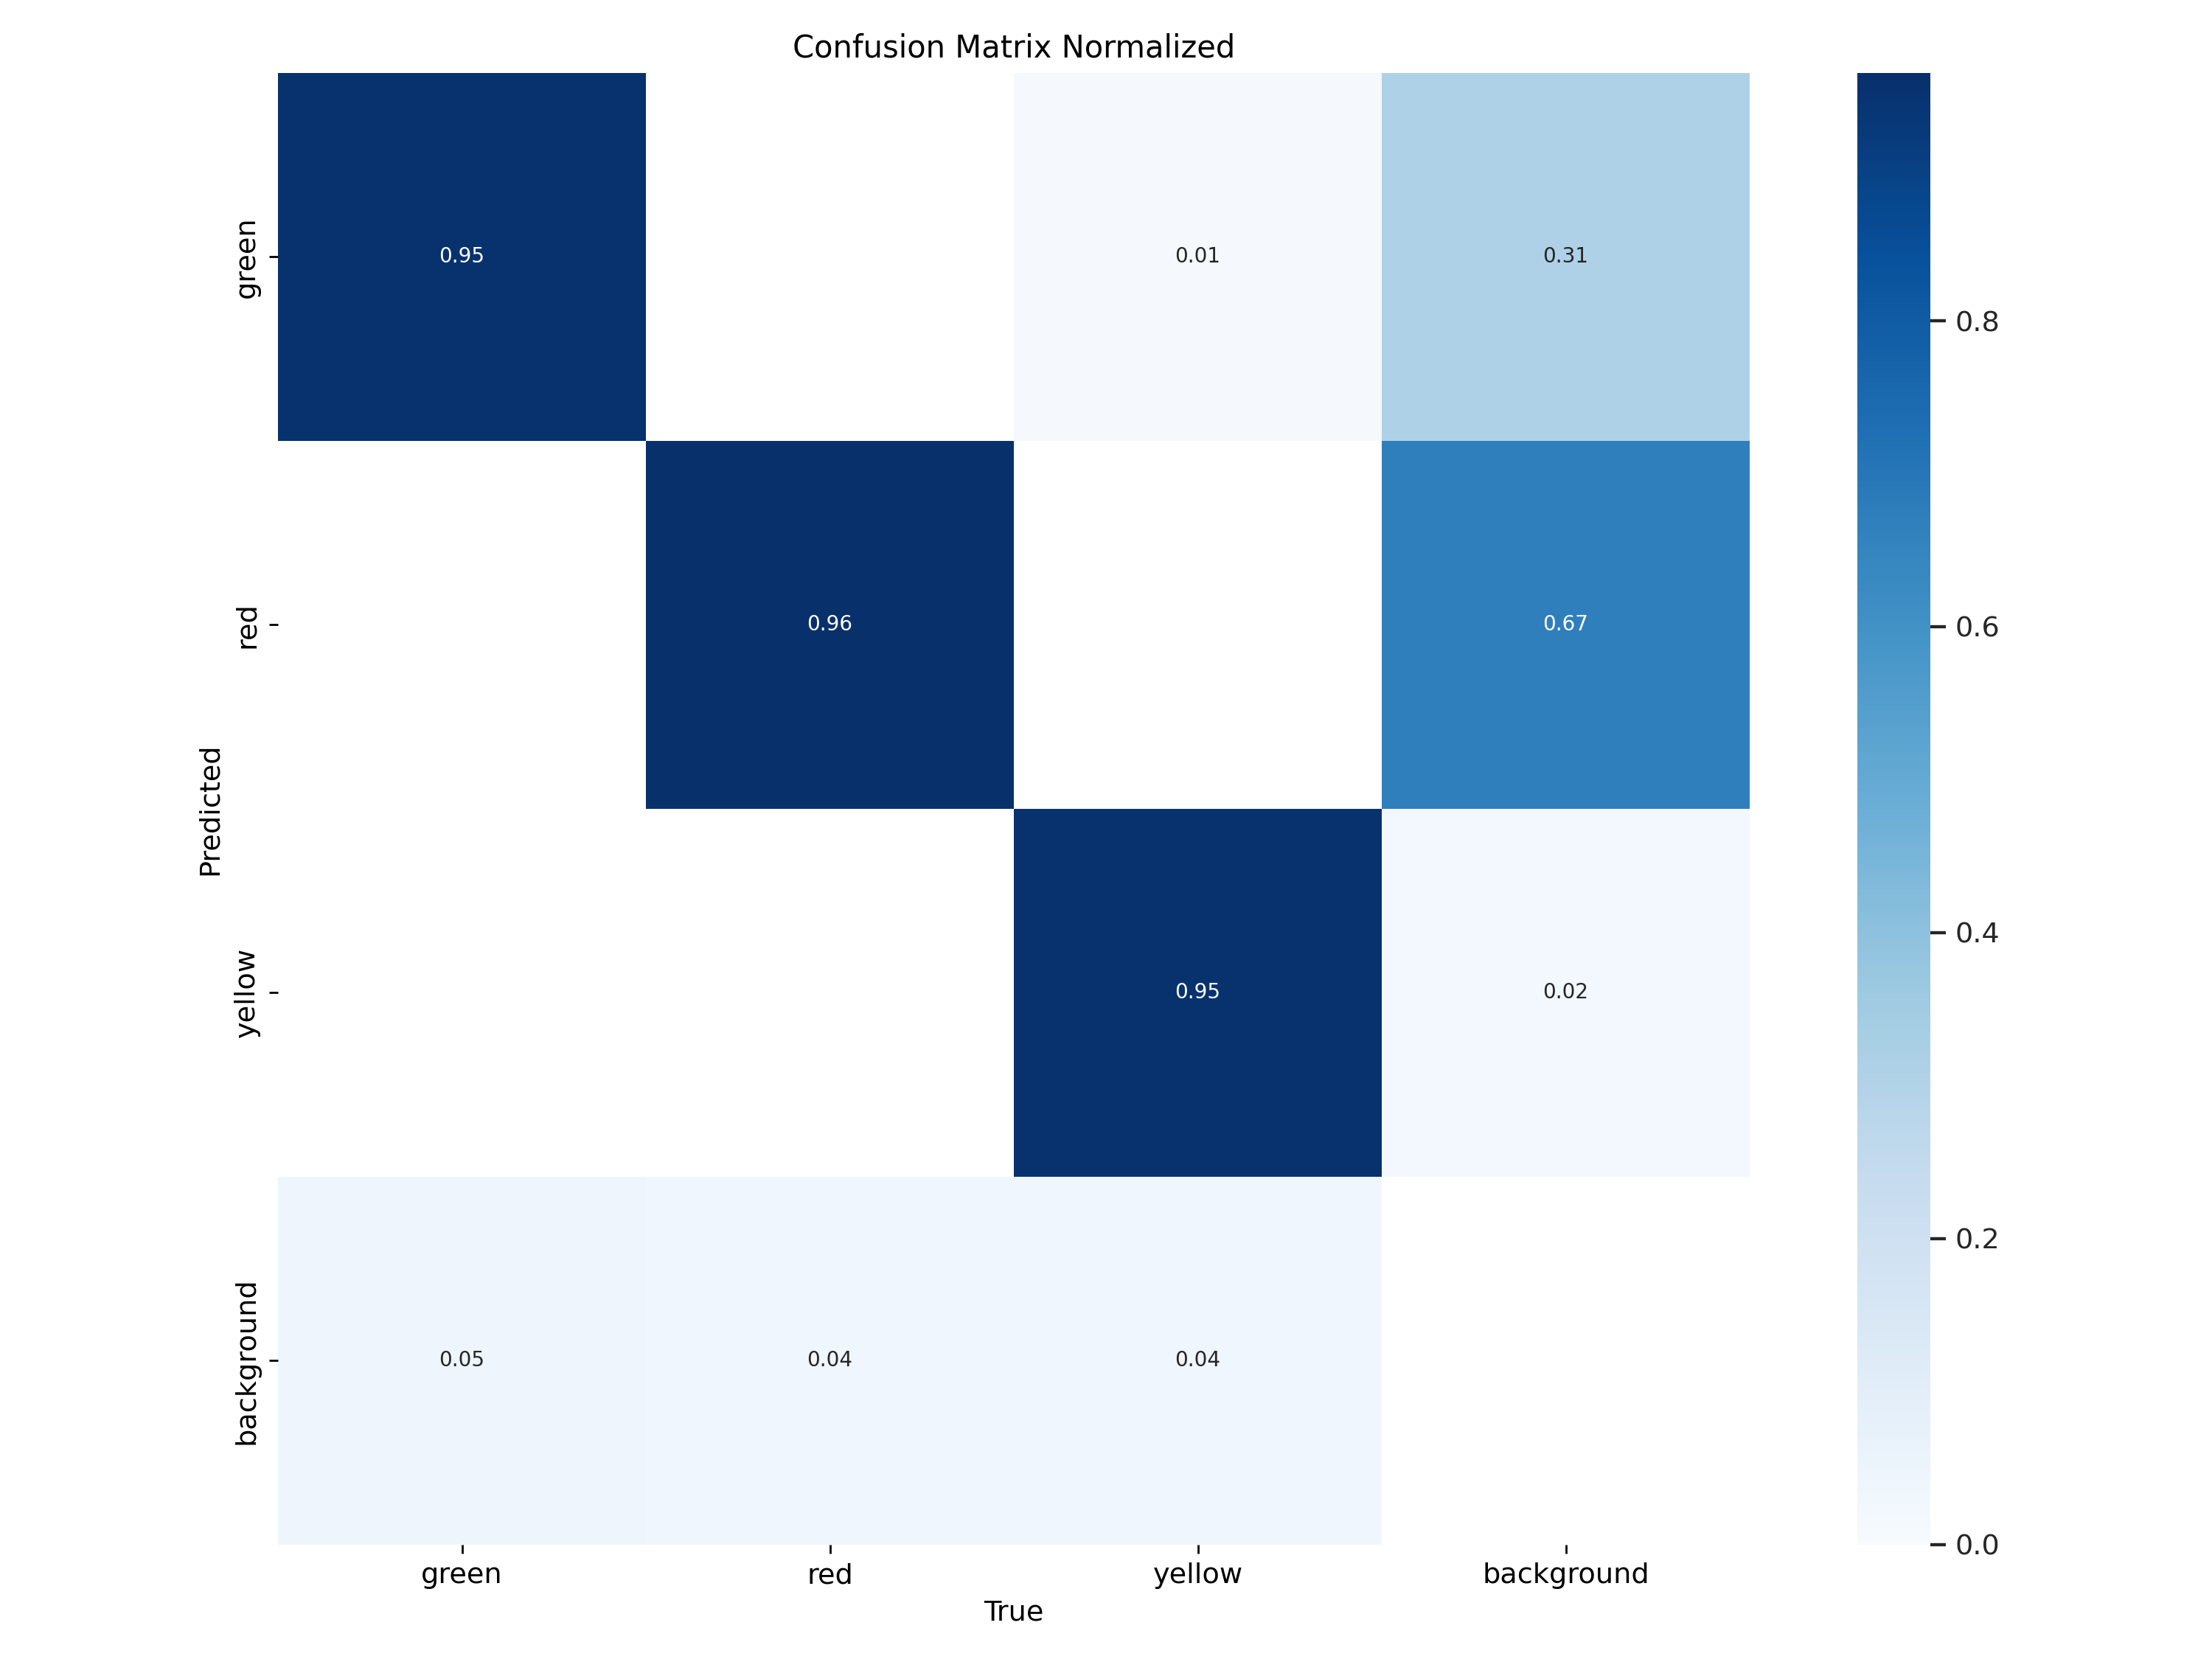

In [26]:
Image(filename='/kaggle/working/runs/detect/val/confusion_matrix_normalized.png', width=600)

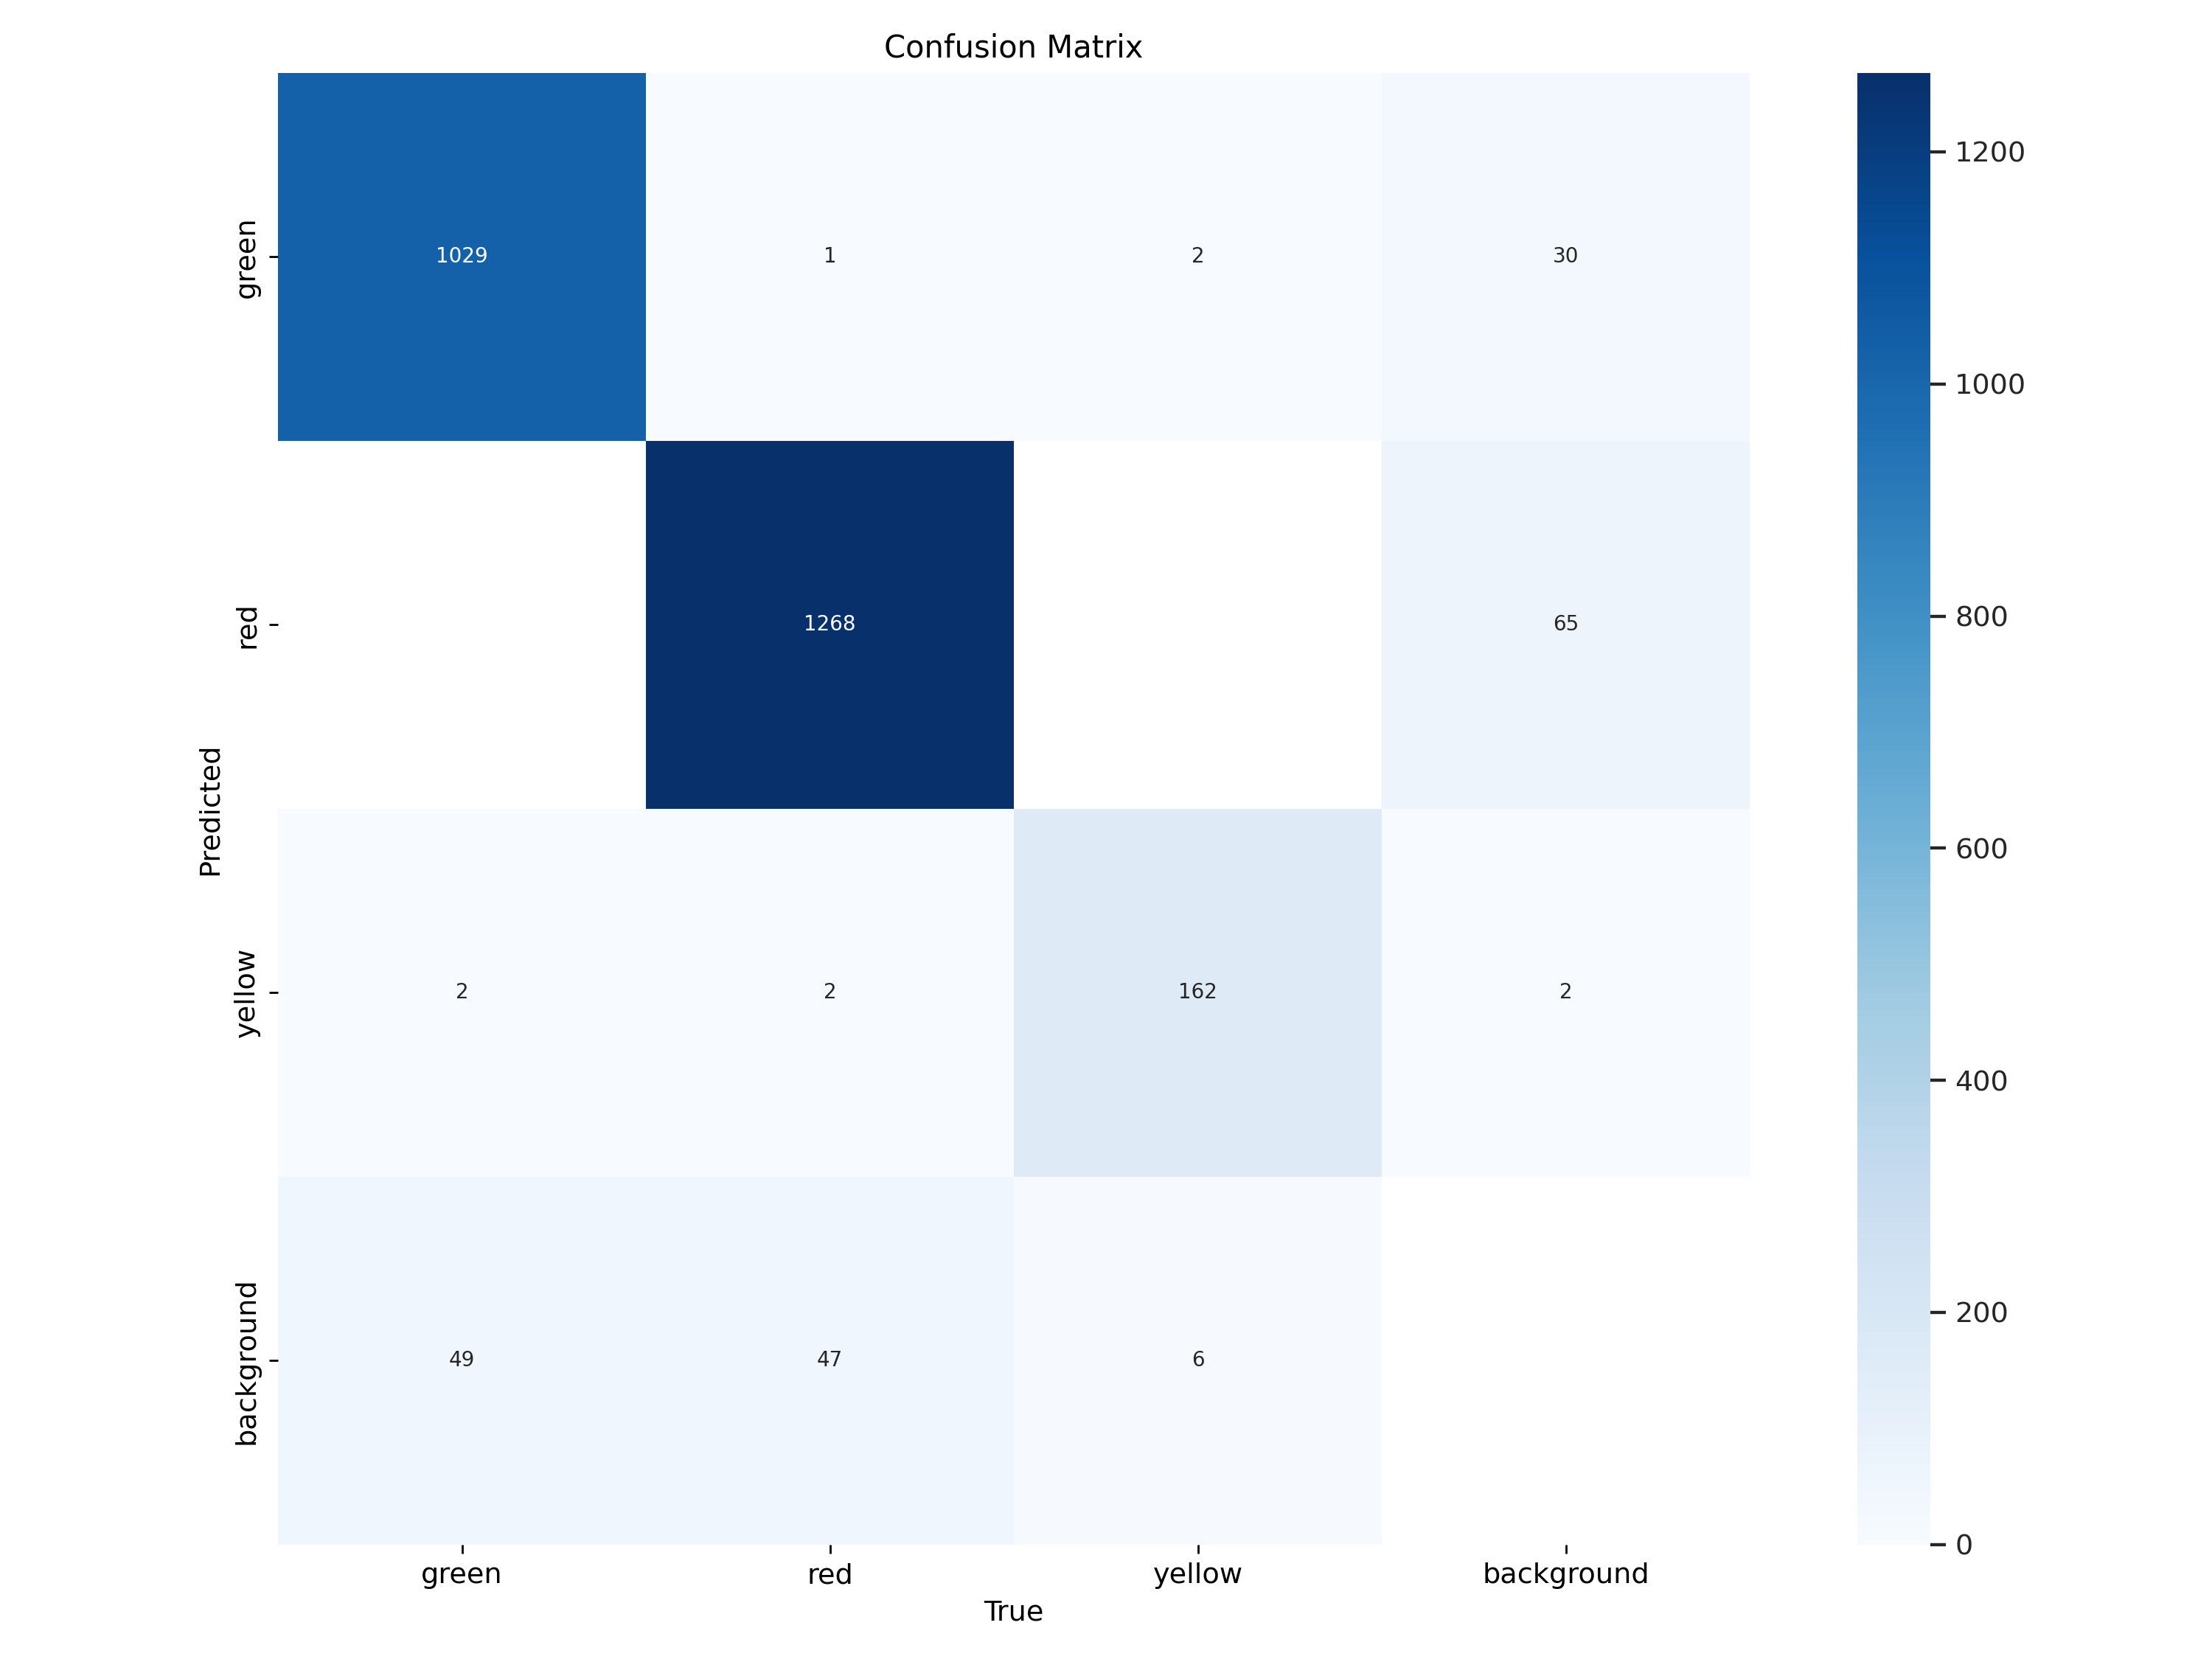

In [27]:
Image(filename='/kaggle/working/runs/detect/val/confusion_matrix.png', width=600)

In [16]:
!yolo task=detect mode=predict model='/kaggle/working/runs/detect/trianResult/weights/best.pt' conf=0.25 source={dataset.location}/test/images save=True     

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/879 /kaggle/working/traffic-lights-3/test/images/2023_0914_111732-Trim_MP4-105_jpg.rf.be7e4cfefef59c4549ded5617796fb28.jpg: 640x640 2 reds, 5.9ms
image 2/879 /kaggle/working/traffic-lights-3/test/images/2023_0914_111732-Trim_MP4-115_jpg.rf.83fe48b7176b86f3fcedd7a6448c3a48.jpg: 640x640 2 reds, 6.8ms
image 3/879 /kaggle/working/traffic-lights-3/test/images/2023_0914_111732-Trim_MP4-19_jpg.rf.7a64f4c0a0315deb33e381ea7582cd37.jpg: 640x640 3 reds, 6.6ms
image 4/879 /kaggle/working/traffic-lights-3/test/images/2023_0914_111732-Trim_MP4-20_jpg.rf.2639c7b8bd7d6b22f6efceca71de472b.jpg: 640x640 3 reds, 6.0ms
image 5/879 /kaggle/working/traffic-lights-3/test/images/2023_0914_111732-Trim_MP4-23_jpg.rf.936fcd90bbf247af071c2a517fe56ac1.jpg: 640x640 3 reds, 6.1ms
image 6/879 /kaggle/working/traffic-lights-3/test/images/20

In [17]:
!yolo task=detect mode=predict model='/kaggle/working/runs/detect/trianResult/weights/best.pt' conf=0.25 source="https://www.heraldnet.com/wp-content/uploads/2022/12/31272559_web1_L1-TrafficLight-EDH-221211-FS.jpg"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

100%|████████████████████████████████████████| 277k/277k [00:00<00:00, 16.2MB/s]
image 1/1 /kaggle/working/31272559_web1_L1-TrafficLight-EDH-221211-FS.jpg: 448x640 3 reds, 47.1ms
Speed: 5.4ms preprocess, 47.1ms inference, 359.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


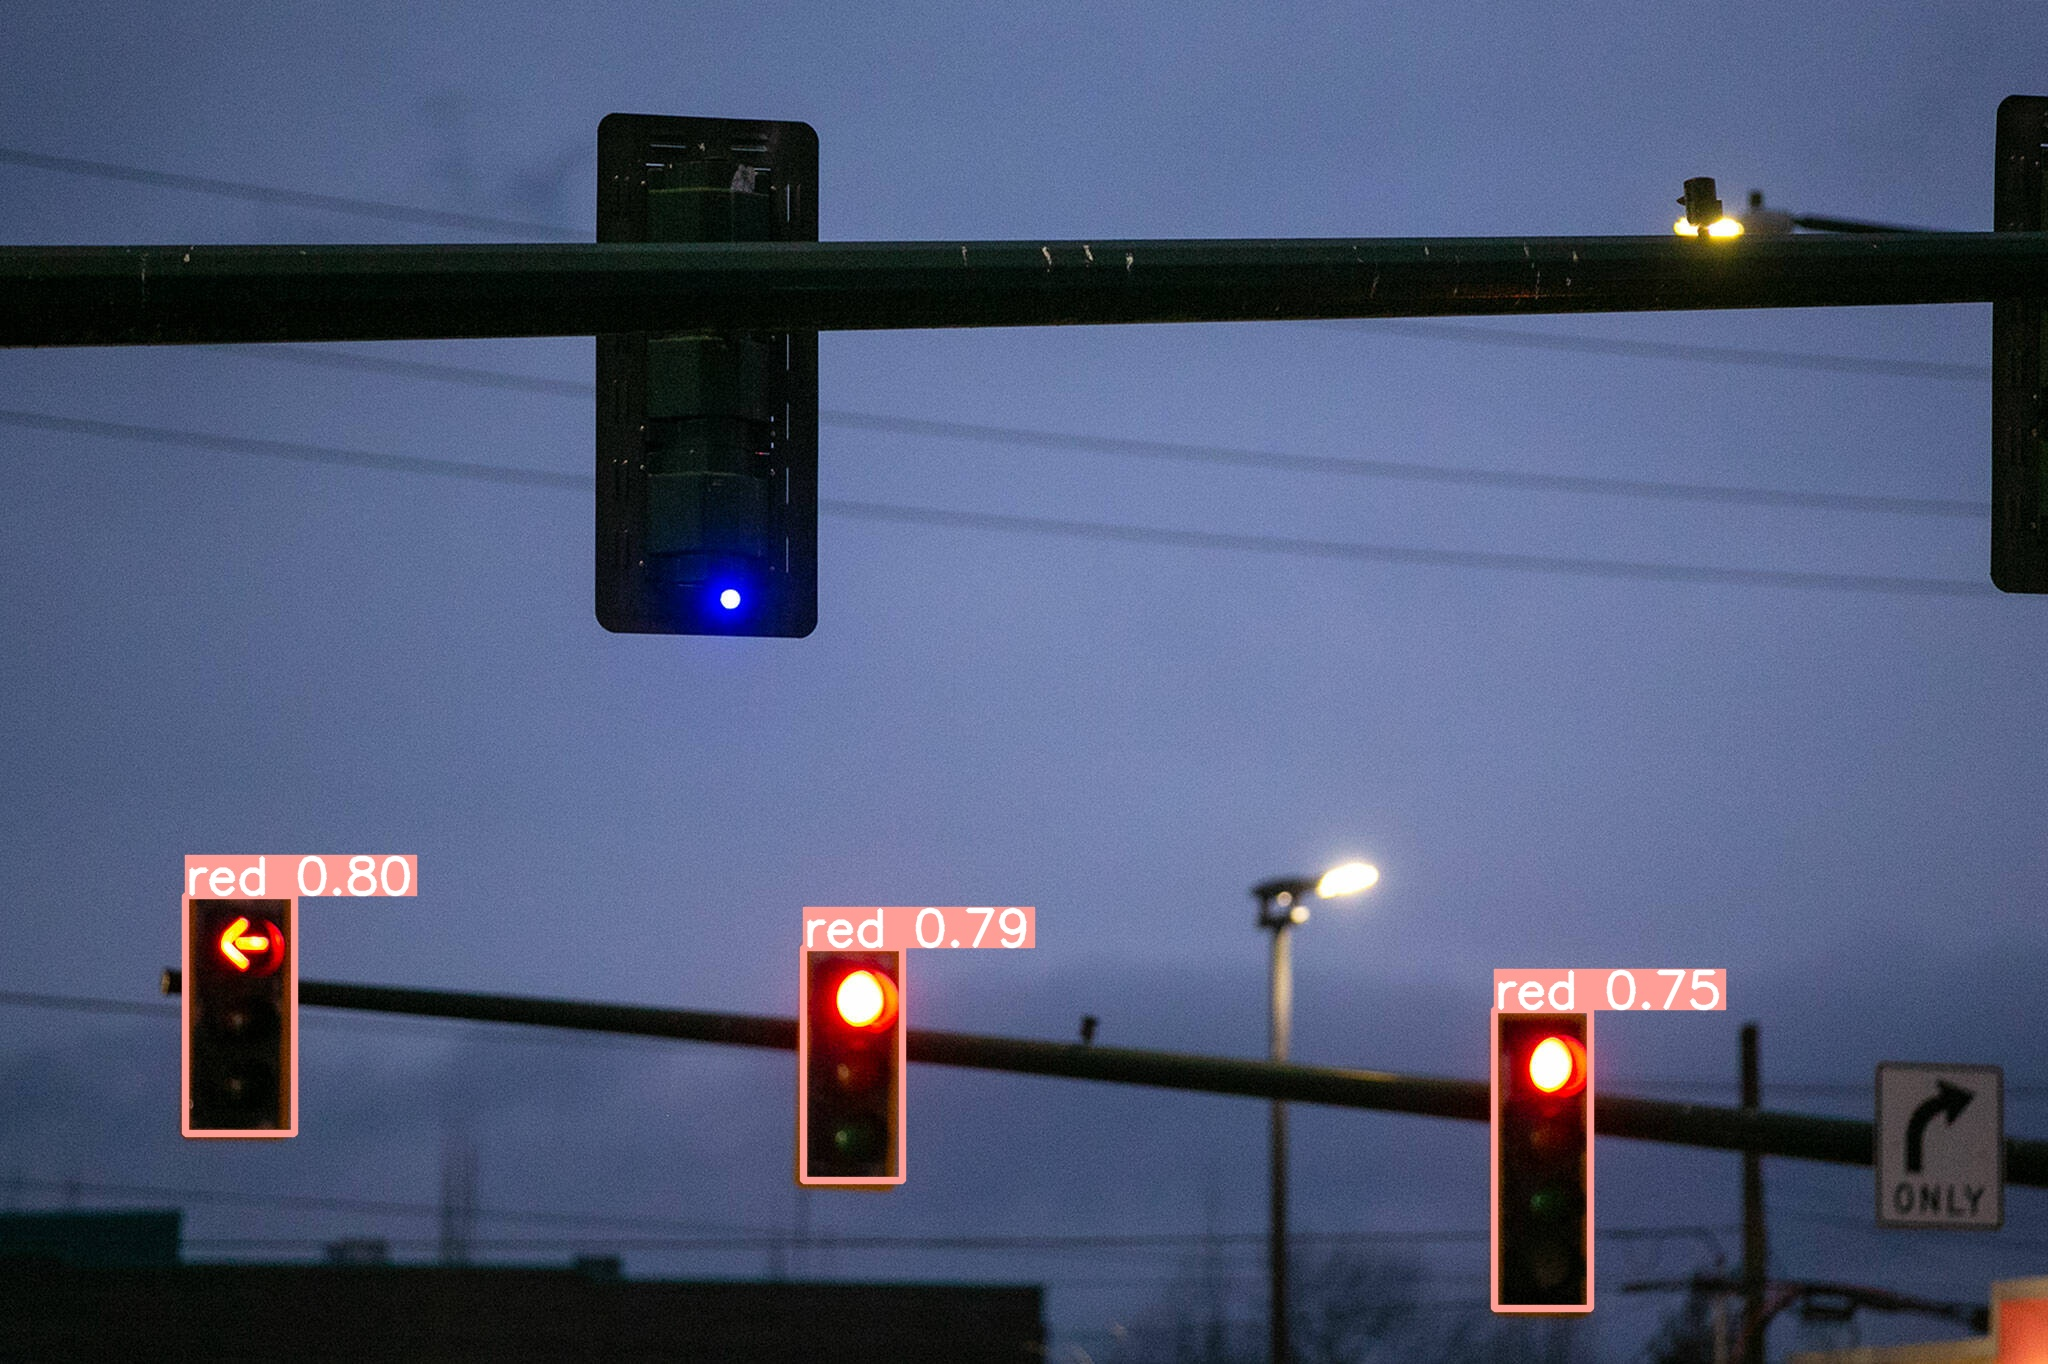

In [18]:
Image(filename='/kaggle/working/runs/detect/predict2/31272559_web1_L1-TrafficLight-EDH-221211-FS.jpg', width=600)

In [19]:
!yolo task=detect mode=predict model='/kaggle/working/runs/detect/trianResult/weights/best.pt' conf=0.25 source="https://static.toiimg.com/thumb/msid-104663667,width-400,height-225,resizemode-72/104663667.jpg"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

19.9kB [00:00, 14.8MB/s]
image 1/1 /kaggle/working/104663667.jpg: 384x640 2 greens, 2 reds, 72.9ms
Speed: 5.0ms preprocess, 72.9ms inference, 354.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


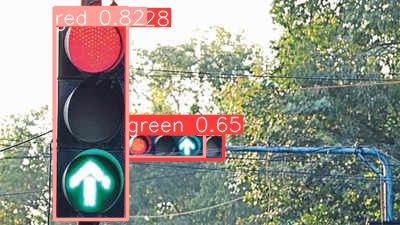

In [20]:
Image(filename='/kaggle/working/runs/detect/predict3/104663667.jpg', width=600)

In [31]:
import pandas as pd
import numpy as np

In [33]:
df=pd.read_csv('/kaggle/working/runs/detect/trianResult/results.csv')

In [35]:
df.head(50)

epoch        train/box_loss        train/cls_loss  \
0                      1               0.97791               2.18940   
1                      2               0.86452               1.10700   
2                      3               0.90294               0.95366   
3                      4               0.89152               0.87694   
4                      5               0.85036               0.79501   
5                      6               0.81630               0.74122   
6                      7               0.80412               0.70511   
7                      8               0.77713               0.66598   
8                      9               0.76495               0.64661   
9                     10               0.75219               0.61943   
10                    11               0.74446               0.60261   
11                    12               0.72809               0.59160   
12                    13               0.71895               0.57598   
13                    14               0.71623               0.56156   
14                    15               0.71505               0.56308   
15                    16               0.69436               0.53773   
16                    17               0.69387               0.53489   
17                    18               0.68874               0.52047   
18                    19               0.68362               0.51549   
19                    20               0.67613               0.50337   
20                    21               0.67216               0.49559   
21                    22               0.67391               0.49045   
22                    23               0.66245               0.48073   
23                    24               0.65414               0.47712   
24                    25               0.65624               0.47572   
25                    26               0.64341               0.46407   
26                    27               0.64646               0.46378   
27                    28               0.64055               0.45426   
28                    29               0.63600               0.44995   
29                    30               0.62948               0.44520   
30                    31               0.62351               0.43584   
31                    32               0.62196               0.43542   
32                    33               0.61374               0.42312   
33                    34               0.61358               0.42089   
34                    35               0.60832               0.41499   
35                    36               0.59982               0.41062   
36                    37               0.59549               0.40634   
37                    38               0.59936               0.40829   
38                    39               0.59084               0.39641   
39                    40               0.59217               0.39398   
40                    41               0.59497               0.31837   
41                    42               0.58762               0.31189   
42                    43               0.58093               0.31023   
43                    44               0.57338               0.30316   
44                    45               0.56966               0.29648   
45                    46               0.56165               0.29227   
46                    47               0.55782               0.28861   
47                    48               0.55251               0.28636   
48                    49               0.54345               0.27707   
49                    50               0.53675               0.27395   

          train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                1.07670               0.77685               0.62942   
1                1.00420               0.84664               0.72580   
2                1.02950               0.85634               0.71343   
3                1.02910               0.86290            